# **Data Visualizaion and EDA Wind Turbine ✴ Power Production**

### Import Libary and Preview Dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import calendar
import statistics
import statsmodels.api as sm

import os
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Merge data
file1 = 'dataset/DATA ST7 (1.1.2022-30.4-2023).xlsx'
df1 = pd.read_excel(file1)
df1.columns = df1.iloc[0]
df1 = df1[1:]

file2 = 'dataset/DATA ST7 (1.5.2023-1.5-2024).xlsx'
df2 = pd.read_excel(file2)
df2.columns = df2.iloc[0]
df2 = df2[1:]

dfs = pd.concat([df1, df2], ignore_index=True)
dfs.to_excel('dataset/data (1.1.2022-1.5.2024).xlsx', index=False)

In [3]:
# Preview data
dfs

0               PCTimeStamp WTG01_Ambient WindSpeed Avg. (1)  \
0       2022-01-01 00:00:00                             14.2   
1       2022-01-01 00:10:00                             15.3   
2       2022-01-01 00:20:00                             13.8   
3       2022-01-01 00:30:00                             14.1   
4       2022-01-01 00:40:00                             14.2   
...                     ...                              ...   
122683  2024-05-01 23:10:00                            6.406   
122684  2024-05-01 23:20:00                             6.68   
122685  2024-05-01 23:30:00                            6.254   
122686  2024-05-01 23:40:00                            5.793   
122687  2024-05-01 23:50:00                             6.43   

0      WTG02_Ambient WindSpeed Avg. (2) WTG03_Ambient WindSpeed Avg. (3)  \
0                                  14.3                             13.3   
1                                  14.6                             13.4   
2                                  13.5                             13.6   
3                                  14.9                             14.9   
4                                  14.2                             13.8   
...                                 ...                              ...   
122683                            6.422                            6.508   
122684                            6.465                             6.68   
122685                            6.555                            6.539   
122686                            6.789                            6.379   
122687                            6.617                            6.527   

0      WTG04_Ambient WindSpeed Avg. (4) WTG05_Ambient WindSpeed Avg. (5)  \
0                                  14.3                             15.1   
1                                  14.3                             14.5   
2                                  13.7                             14.7   
3                                    15                             14.2   
4                                  14.2                             13.8   
...                                 ...                              ...   
122683                            6.379                            3.875   
122684                            6.668                            3.891   
122685                            6.734                            4.133   
122686                            6.629                            3.859   
122687                            6.625                             3.75   

0      WTG06_Ambient WindSpeed Avg. (6) WTG07_Ambient WindSpeed Avg. (7)  \
0                                  15.1                             15.8   
1                                    15                             14.6   
2                                  14.5                             14.8   
3                                  14.5                             14.1   
4                                  15.1                             14.7   
...                                 ...                              ...   
122683                             4.41                            5.215   
122684                            4.371                            5.512   
122685                            4.578                            5.719   
122686                            4.371                            5.973   
122687                            4.012                            6.215   

0      WTG01_Ambient WindDir Absolute Avg. (8)  \
0                                          359   
1                                          1.1   
2                                            3   
3                                          4.2   
4                                          2.3   
...                                        ...   
122683                                  116.97   
122684                                 116.494   
122685                                 118

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122688 entries, 0 to 122687
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   PCTimeStamp                               122688 non-null  object
 1   WTG01_Ambient WindSpeed Avg. (1)          122163 non-null  object
 2   WTG02_Ambient WindSpeed Avg. (2)          122335 non-null  object
 3   WTG03_Ambient WindSpeed Avg. (3)          122342 non-null  object
 4   WTG04_Ambient WindSpeed Avg. (4)          122337 non-null  object
 5   WTG05_Ambient WindSpeed Avg. (5)          122107 non-null  object
 6   WTG06_Ambient WindSpeed Avg. (6)          122205 non-null  object
 7   WTG07_Ambient WindSpeed Avg. (7)          122255 non-null  object
 8   WTG01_Ambient WindDir Absolute Avg. (8)   121464 non-null  object
 9   WTG02_Ambient WindDir Absolute Avg. (9)   121895 non-null  object
 10  WTG03_Ambient WindDir Absolute A

---
## **EDA - Exploratory Data Analyst**
---

### **1. Structuring Time Series**

In [5]:
# Structuring Time Series
dfs['PCTimeStamp'] = pd.to_datetime(dfs['PCTimeStamp']) 
dfs.sort_values(by=['PCTimeStamp'], inplace=True, ascending=True) #Above line will sort the values according to dates

# Convert all columns to float64, except 'TimeStamp'
cols = dfs.columns.drop('PCTimeStamp')
dfs[cols] = dfs[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
dfs

0              PCTimeStamp  WTG01_Ambient WindSpeed Avg. (1)  \
0      2022-01-01 00:00:00                            14.200   
1      2022-01-01 00:10:00                            15.300   
2      2022-01-01 00:20:00                            13.800   
3      2022-01-01 00:30:00                            14.100   
4      2022-01-01 00:40:00                            14.200   
...                    ...                               ...   
122683 2024-05-01 23:10:00                             6.406   
122684 2024-05-01 23:20:00                             6.680   
122685 2024-05-01 23:30:00                             6.254   
122686 2024-05-01 23:40:00                             5.793   
122687 2024-05-01 23:50:00                             6.430   

0       WTG02_Ambient WindSpeed Avg. (2)  WTG03_Ambient WindSpeed Avg. (3)  \
0                                 14.300                            13.300   
1                                 14.600                            13.400   
2                                 13.500                            13.600   
3                                 14.900                            14.900   
4                                 14.200                            13.800   
...                                  ...                               ...   
122683                             6.422                             6.508   
122684                             6.465                             6.680   
122685                             6.555                             6.539   
122686                             6.789                             6.379   
122687                             6.617                             6.527   

0       WTG04_Ambient WindSpeed Avg. (4)  WTG05_Ambient WindSpeed Avg. (5)  \
0                                 14.300                            15.100   
1                                 14.300                            14.500   
2                                 13.700                            14.700   
3                                 15.000                            14.200   
4                                 14.200                            13.800   
...                                  ...                               ...   
122683                             6.379                             3.875   
122684                             6.668                             3.891   
122685                             6.734                             4.133   
122686                             6.629                             3.859   
122687                             6.625                             3.750   

0       WTG06_Ambient WindSpeed Avg. (6)  WTG07_Ambient WindSpeed Avg. (7)  \
0                                 15.100                            15.800   
1                                 15.000                            14.600   
2                                 14.500                            14.800   
3                                 14.500                            14.100   
4                                 15.100                            14.700   
...                                  ...                               ...   
122683                             4.410                             5.215   
122684                             4.371                             5.512   
122685                             4.578                             5.719   
122686                             4.371                             5.973   
122687                             4.012                             6.215   

0       WTG01_Ambient WindDir Absolute Avg. (8)  \
0                                       359.000   
1                                         1.100   
2                                         3.000   
3                                         4.200   
4                                         2.300   
...                                         ...   
122683                                  116.970   
122684      

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122688 entries, 0 to 122687
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   PCTimeStamp                               122688 non-null  datetime64[ns]
 1   WTG01_Ambient WindSpeed Avg. (1)          122163 non-null  float64       
 2   WTG02_Ambient WindSpeed Avg. (2)          122335 non-null  float64       
 3   WTG03_Ambient WindSpeed Avg. (3)          122342 non-null  float64       
 4   WTG04_Ambient WindSpeed Avg. (4)          122337 non-null  float64       
 5   WTG05_Ambient WindSpeed Avg. (5)          122107 non-null  float64       
 6   WTG06_Ambient WindSpeed Avg. (6)          122205 non-null  float64       
 7   WTG07_Ambient WindSpeed Avg. (7)          122255 non-null  float64       
 8   WTG01_Ambient WindDir Absolute Avg. (8)   121464 non-null  float64       
 9   WTG02_Ambient W

In [8]:
# Split Time to Day, Month, Hour, Week, Seasons

dfs['Week']=dfs['PCTimeStamp'].dt.day // 7 + 1
dfs['Month']=dfs['PCTimeStamp'].dt.month
seasons_dict = {1: 'Dry season', 2: 'Dry season', 3: 'Dry season', 4: 'Dry season', 
                5: 'Rainy season', 6: 'Rainy season', 7: 'Rainy season', 8: 'Rainy season', 9: 'Rainy season', 10: 'Rainy season', 
                11: 'Dry season', 12: 'Dry season'}
dfs['Seasons'] = dfs['Month'].map(seasons_dict)
dfs['Day']=dfs['PCTimeStamp'].dt.day
dfs['Hour']=dfs['PCTimeStamp'].dt.hour+1

dfs

0              PCTimeStamp  WTG01_Ambient WindSpeed Avg. (1)  \
0      2022-01-01 00:00:00                            14.200   
1      2022-01-01 00:10:00                            15.300   
2      2022-01-01 00:20:00                            13.800   
3      2022-01-01 00:30:00                            14.100   
4      2022-01-01 00:40:00                            14.200   
...                    ...                               ...   
122683 2024-05-01 23:10:00                             6.406   
122684 2024-05-01 23:20:00                             6.680   
122685 2024-05-01 23:30:00                             6.254   
122686 2024-05-01 23:40:00                             5.793   
122687 2024-05-01 23:50:00                             6.430   

0       WTG02_Ambient WindSpeed Avg. (2)  WTG03_Ambient WindSpeed Avg. (3)  \
0                                 14.300                            13.300   
1                                 14.600                            13.400   
2                                 13.500                            13.600   
3                                 14.900                            14.900   
4                                 14.200                            13.800   
...                                  ...                               ...   
122683                             6.422                             6.508   
122684                             6.465                             6.680   
122685                             6.555                             6.539   
122686                             6.789                             6.379   
122687                             6.617                             6.527   

0       WTG04_Ambient WindSpeed Avg. (4)  WTG05_Ambient WindSpeed Avg. (5)  \
0                                 14.300                            15.100   
1                                 14.300                            14.500   
2                                 13.700                            14.700   
3                                 15.000                            14.200   
4                                 14.200                            13.800   
...                                  ...                               ...   
122683                             6.379                             3.875   
122684                             6.668                             3.891   
122685                             6.734                             4.133   
122686                             6.629                             3.859   
122687                             6.625                             3.750   

0       WTG06_Ambient WindSpeed Avg. (6)  WTG07_Ambient WindSpeed Avg. (7)  \
0                                 15.100                            15.800   
1                                 15.000                            14.600   
2                                 14.500                            14.800   
3                                 14.500                            14.100   
4                                 15.100                            14.700   
...                                  ...                               ...   
122683                             4.410                             5.215   
122684                             4.371                             5.512   
122685                             4.578                             5.719   
122686                             4.371                             5.973   
122687                             4.012                             6.215   

0       WTG01_Ambient WindDir Absolute Avg. (8)  \
0                                       359.000   
1                                         1.100   
2                                         3.000   
3                                         4.200   
4                                         2.300   
...                                         ...   
122683                                  116.970   
122684      

In [9]:
print(dfs.columns)

Index(['PCTimeStamp', 'WTG01_Ambient WindSpeed Avg. (1)',
       'WTG02_Ambient WindSpeed Avg. (2)', 'WTG03_Ambient WindSpeed Avg. (3)',
       'WTG04_Ambient WindSpeed Avg. (4)', 'WTG05_Ambient WindSpeed Avg. (5)',
       'WTG06_Ambient WindSpeed Avg. (6)', 'WTG07_Ambient WindSpeed Avg. (7)',
       'WTG01_Ambient WindDir Absolute Avg. (8)',
       'WTG02_Ambient WindDir Absolute Avg. (9)',
       'WTG03_Ambient WindDir Absolute Avg. (10)',
       'WTG04_Ambient WindDir Absolute Avg. (11)',
       'WTG05_Ambient WindDir Absolute Avg. (12)',
       'WTG06_Ambient WindDir Absolute Avg. (13)',
       'WTG07_Ambient WindDir Absolute Avg. (14)',
       'WTG01_Ambient Temp. Avg. (15)', 'WTG02_Ambient Temp. Avg. (16)',
       'WTG03_Ambient Temp. Avg. (17)', 'WTG04_Ambient Temp. Avg. (18)',
       'WTG05_Ambient Temp. Avg. (19)', 'WTG06_Ambient Temp. Avg. (20)',
       'WTG07_Ambient Temp. Avg. (21)',
       'WTG01_Grid Production Power Avg. (22)',
       'WTG02_Grid Production Power Avg. (2

---
### **2. Missing Value Imputation in Time Series**

In [10]:
dfs.isnull().sum()

0
PCTimeStamp                                    0
WTG01_Ambient WindSpeed Avg. (1)             525
WTG02_Ambient WindSpeed Avg. (2)             353
WTG03_Ambient WindSpeed Avg. (3)             346
WTG04_Ambient WindSpeed Avg. (4)             351
WTG05_Ambient WindSpeed Avg. (5)             581
WTG06_Ambient WindSpeed Avg. (6)             483
WTG07_Ambient WindSpeed Avg. (7)             433
WTG01_Ambient WindDir Absolute Avg. (8)     1224
WTG02_Ambient WindDir Absolute Avg. (9)      793
WTG03_Ambient WindDir Absolute Avg. (10)     782
WTG04_Ambient WindDir Absolute Avg. (11)     793
WTG05_Ambient WindDir Absolute Avg. (12)    1268
WTG06_Ambient WindDir Absolute Avg. (13)    1166
WTG07_Ambient WindDir Absolute Avg. (14)    1116
WTG01_Ambient Temp. Avg. (15)               1224
WTG02_Ambient Temp. Avg. (16)                793
WTG03_Ambient Temp. Avg. (17)                782
WTG04_Ambient Temp. Avg. (18)                793
WTG05_Ambient Temp. Avg. (19)               1268
WTG06_Ambient Temp

<Axes: >

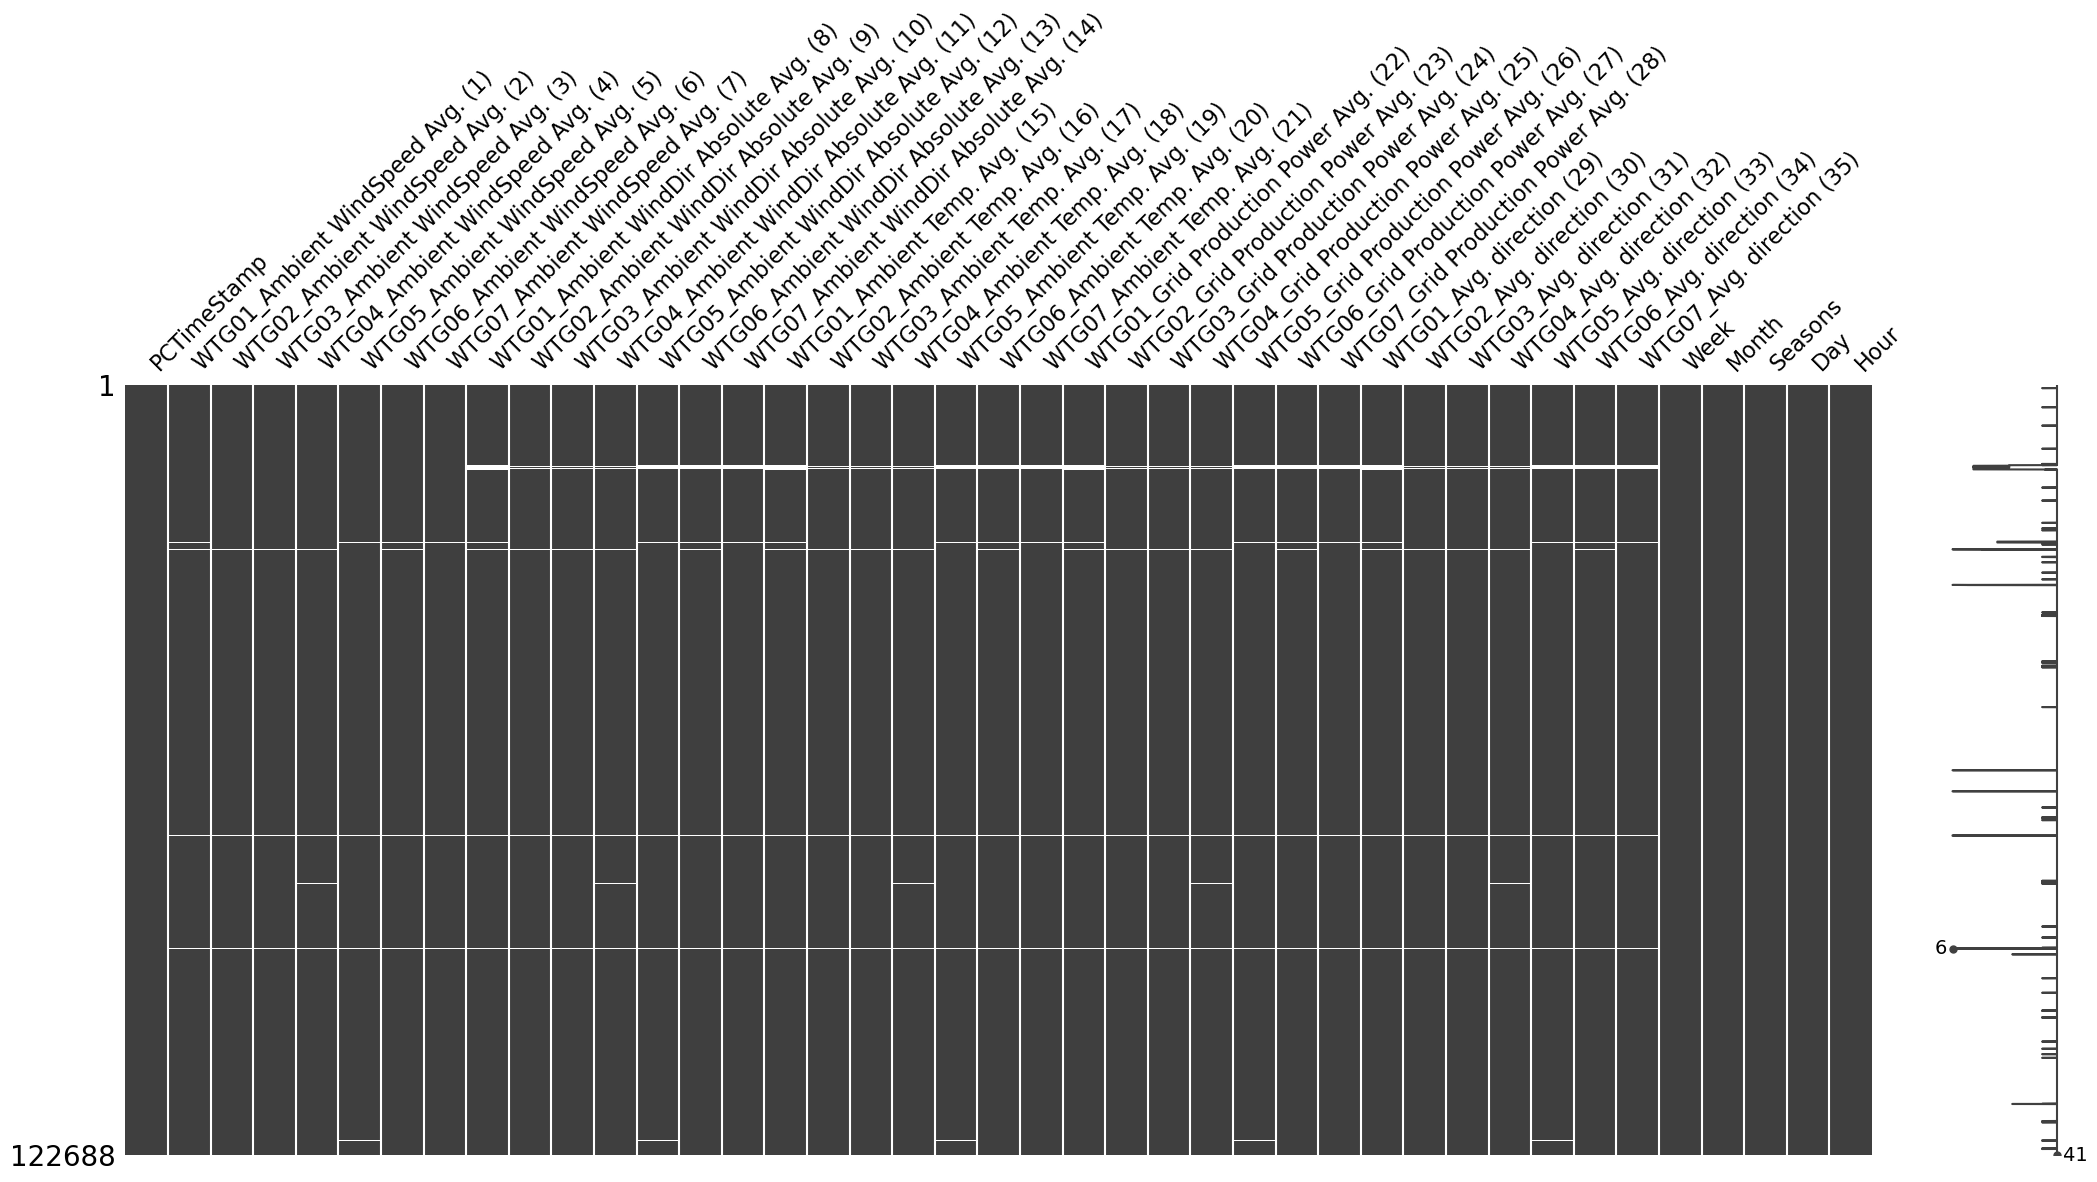

In [11]:
import missingno as msno
msno.matrix(dfs)

In [12]:
# Delete missing data and count deleted rows
def delete_missing(data):
    initial_row_count = len(data)
    for col in data.columns:
        miss_ind = data[col][data[col].isnull()].index
        data = data.drop(miss_ind, axis = 0)
    final_row_count = len(data)
    deleted_rows = initial_row_count - final_row_count
    return data, deleted_rows

dfs, deleted_rows = delete_missing(dfs)
print(f"Deleted rows: {deleted_rows}")
dfs.isnull().sum()

Deleted rows: 1621


0
PCTimeStamp                                 0
WTG01_Ambient WindSpeed Avg. (1)            0
WTG02_Ambient WindSpeed Avg. (2)            0
WTG03_Ambient WindSpeed Avg. (3)            0
WTG04_Ambient WindSpeed Avg. (4)            0
WTG05_Ambient WindSpeed Avg. (5)            0
WTG06_Ambient WindSpeed Avg. (6)            0
WTG07_Ambient WindSpeed Avg. (7)            0
WTG01_Ambient WindDir Absolute Avg. (8)     0
WTG02_Ambient WindDir Absolute Avg. (9)     0
WTG03_Ambient WindDir Absolute Avg. (10)    0
WTG04_Ambient WindDir Absolute Avg. (11)    0
WTG05_Ambient WindDir Absolute Avg. (12)    0
WTG06_Ambient WindDir Absolute Avg. (13)    0
WTG07_Ambient WindDir Absolute Avg. (14)    0
WTG01_Ambient Temp. Avg. (15)               0
WTG02_Ambient Temp. Avg. (16)               0
WTG03_Ambient Temp. Avg. (17)               0
WTG04_Ambient Temp. Avg. (18)               0
WTG05_Ambient Temp. Avg. (19)               0
WTG06_Ambient Temp. Avg. (20)               0
WTG07_Ambient Temp. Avg. (21)   

---
### **3. Vizualization a Time Series**

This method may lose some information from the original time series, but it may be useful in extracting certain features regarding the trends in the time series.



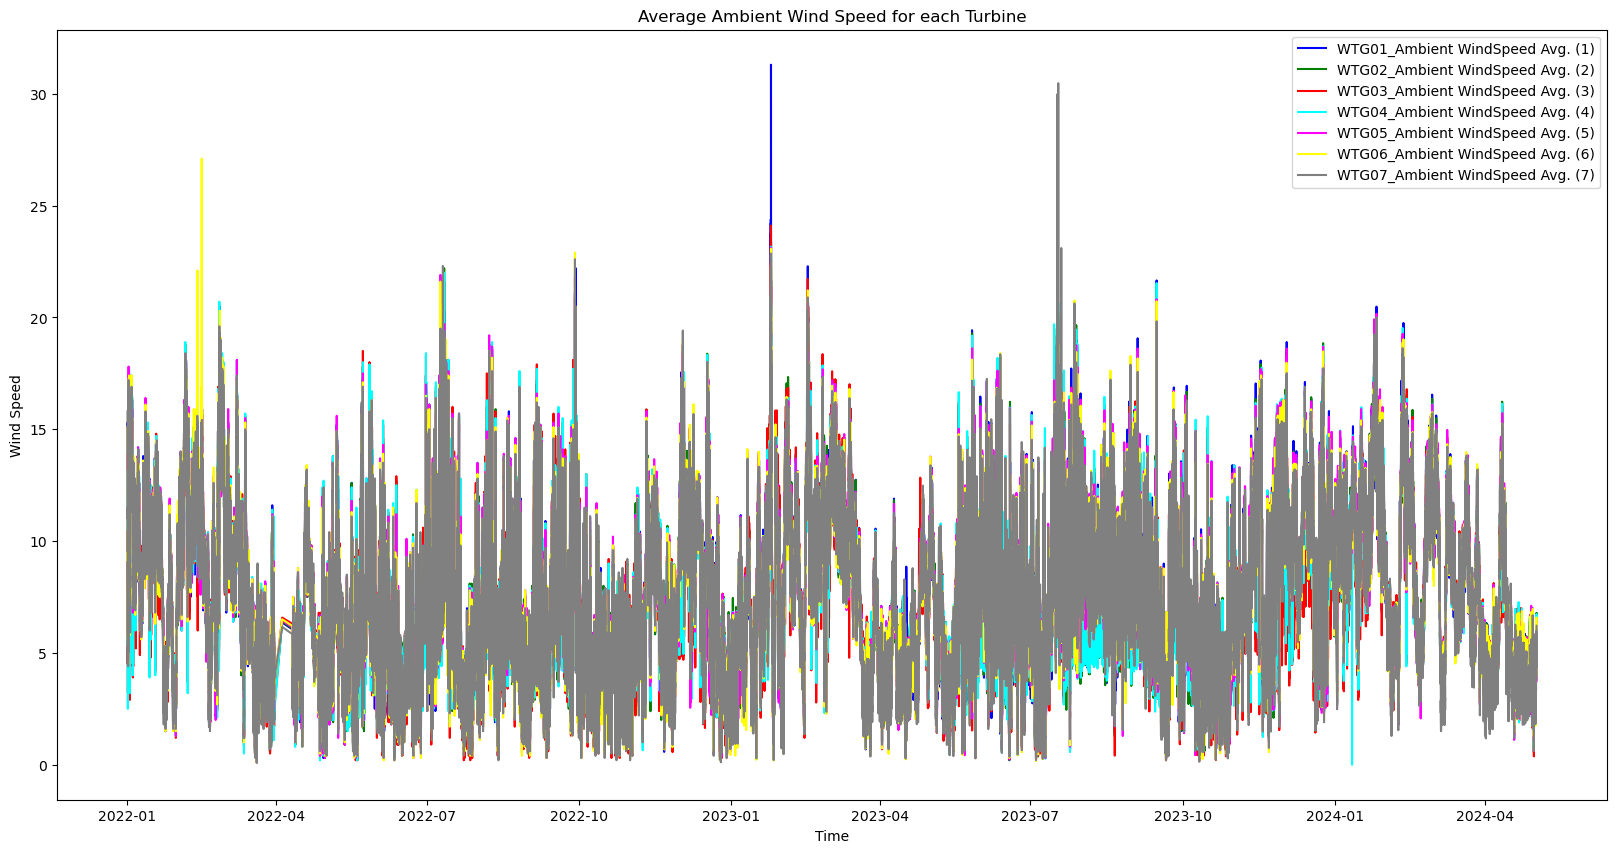

In [13]:
# Average Ambient Wind Speed for each Turbine
plt.figure(figsize=(20,10))

turbines = ['WTG01_Ambient WindSpeed Avg. (1)', 
            'WTG02_Ambient WindSpeed Avg. (2)', 
            'WTG03_Ambient WindSpeed Avg. (3)', 
            'WTG04_Ambient WindSpeed Avg. (4)', 
            'WTG05_Ambient WindSpeed Avg. (5)', 
            'WTG06_Ambient WindSpeed Avg. (6)', 
            'WTG07_Ambient WindSpeed Avg. (7)']

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray']

for turbine, color in zip(turbines, colors):
    plt.plot(dfs['PCTimeStamp'],dfs[turbine], color=color, label=turbine)
    #plt.scatter(dfs[turbine], color=color, label=turbine)

plt.title('Average Ambient Wind Speed for each Turbine')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend(loc='best')
plt.show()

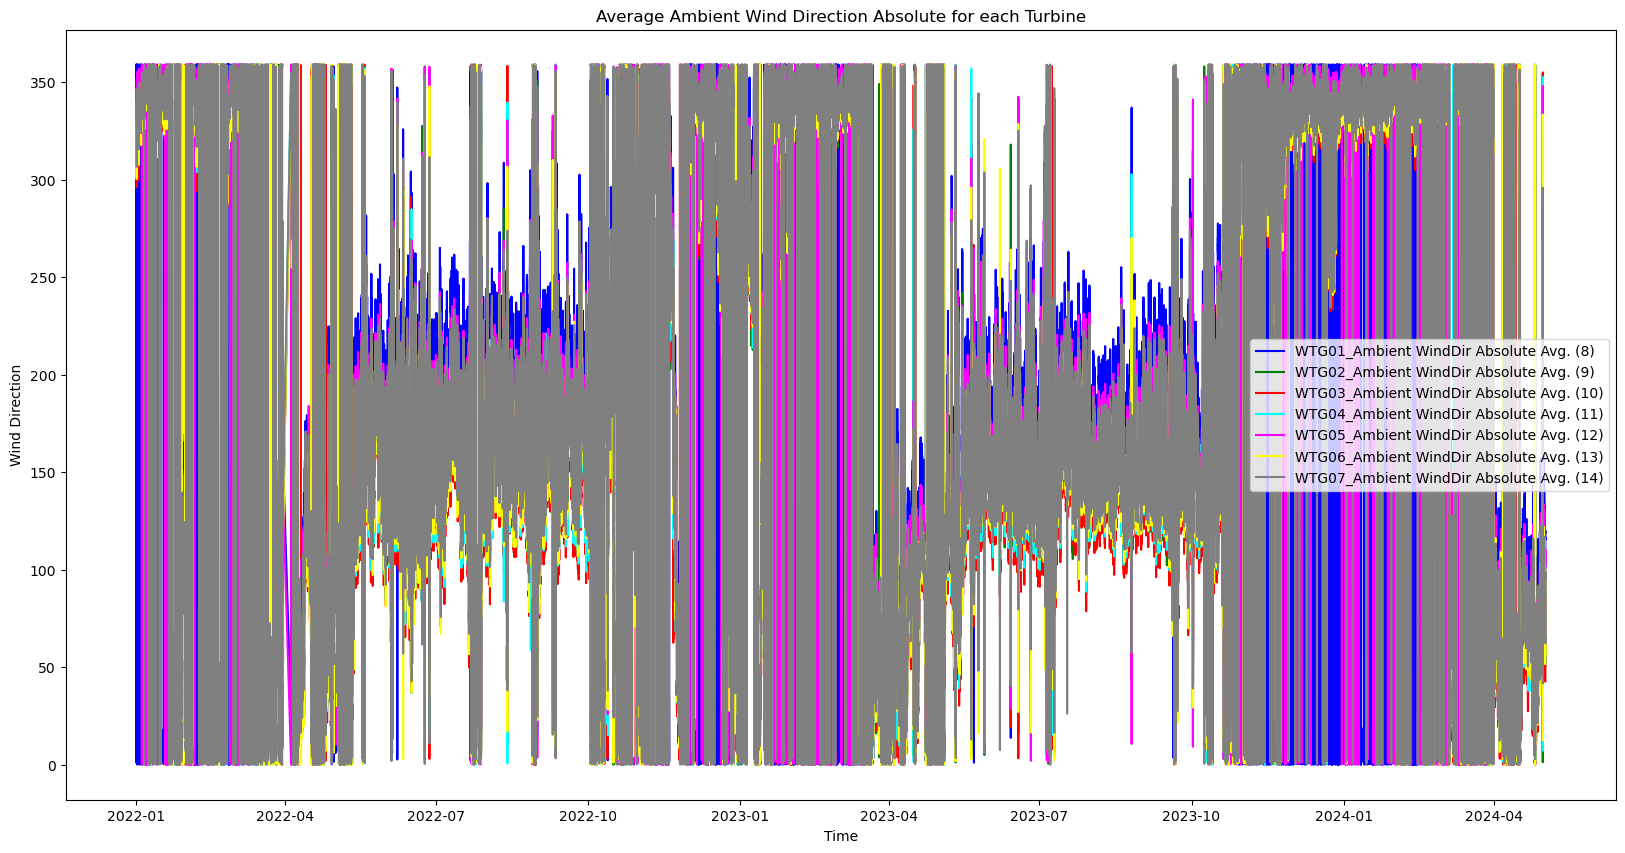

In [14]:
# Average Ambient Wind Direction Absolute for each Turbine
plt.figure(figsize=(20,10))

turbines = ['WTG01_Ambient WindDir Absolute Avg. (8)',
            'WTG02_Ambient WindDir Absolute Avg. (9)',
            'WTG03_Ambient WindDir Absolute Avg. (10)',
            'WTG04_Ambient WindDir Absolute Avg. (11)',
            'WTG05_Ambient WindDir Absolute Avg. (12)',
            'WTG06_Ambient WindDir Absolute Avg. (13)',
            'WTG07_Ambient WindDir Absolute Avg. (14)']

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray']

for turbine, color in zip(turbines, colors):
    plt.plot(dfs['PCTimeStamp'],dfs[turbine], color=color, label=turbine)
    #plt.scatter(dfs[turbine], color=color, label=turbine)

plt.title('Average Ambient Wind Direction Absolute for each Turbine')
plt.xlabel('Time')
plt.ylabel('Wind Direction')
plt.legend(loc='best')
plt.show()

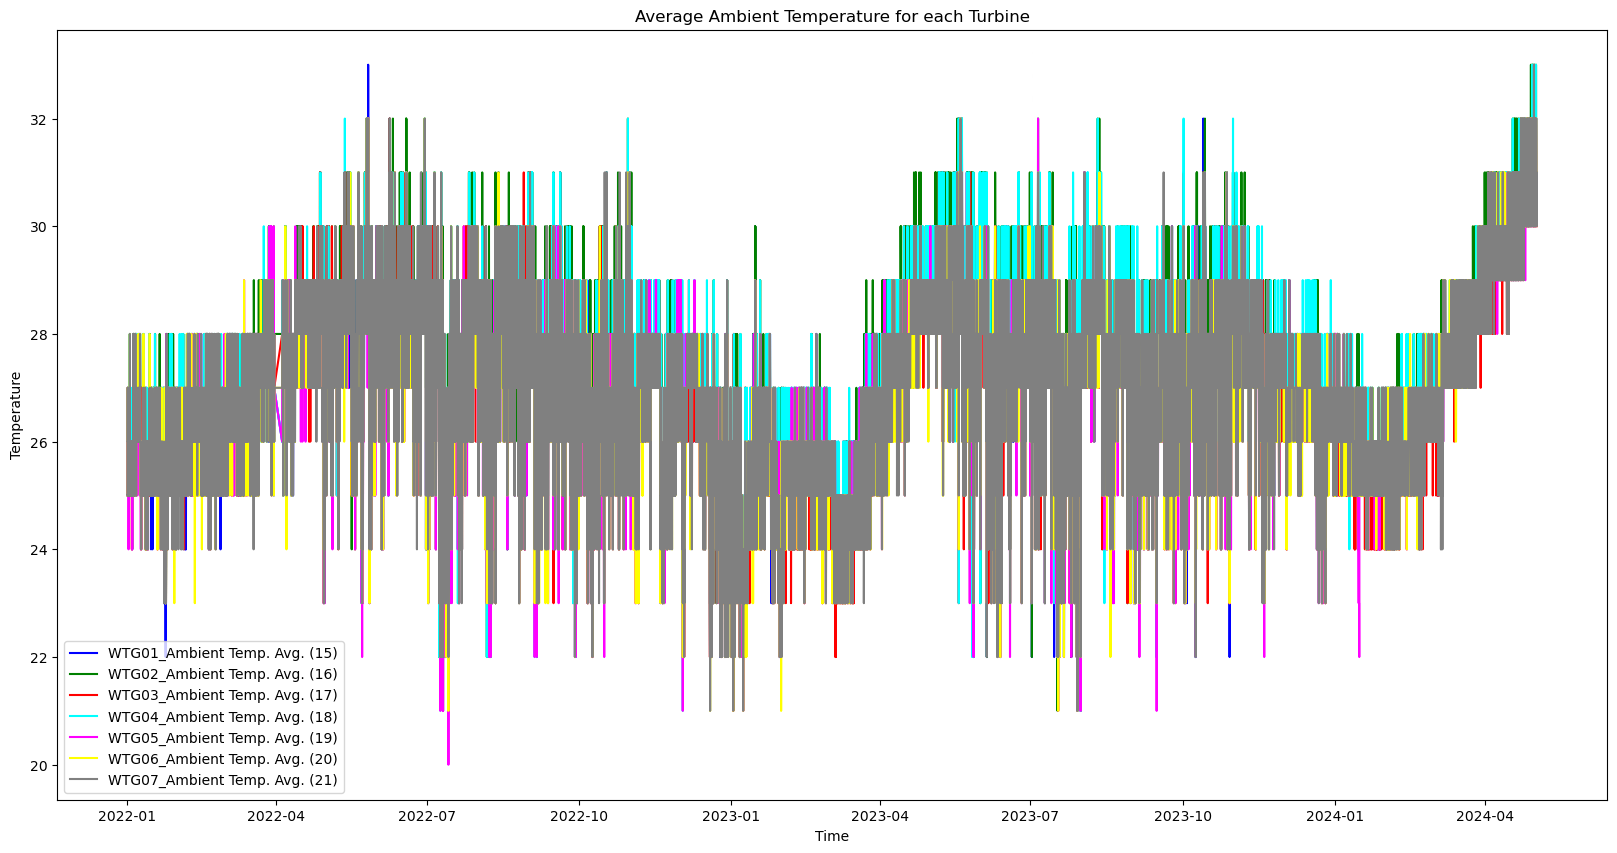

In [15]:
# Average Ambient Temperature for each Turbine
plt.figure(figsize=(20,10))

turbines = ['WTG01_Ambient Temp. Avg. (15)',
            'WTG02_Ambient Temp. Avg. (16)',
            'WTG03_Ambient Temp. Avg. (17)',
            'WTG04_Ambient Temp. Avg. (18)',
            'WTG05_Ambient Temp. Avg. (19)',
            'WTG06_Ambient Temp. Avg. (20)',
            'WTG07_Ambient Temp. Avg. (21)']

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray']

for turbine, color in zip(turbines, colors):
    plt.plot(dfs['PCTimeStamp'],dfs[turbine], color=color, label=turbine)
    #plt.scatter(dfs[turbine], color=color, label=turbine)

plt.title('Average Ambient Temperature for each Turbine')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.show()

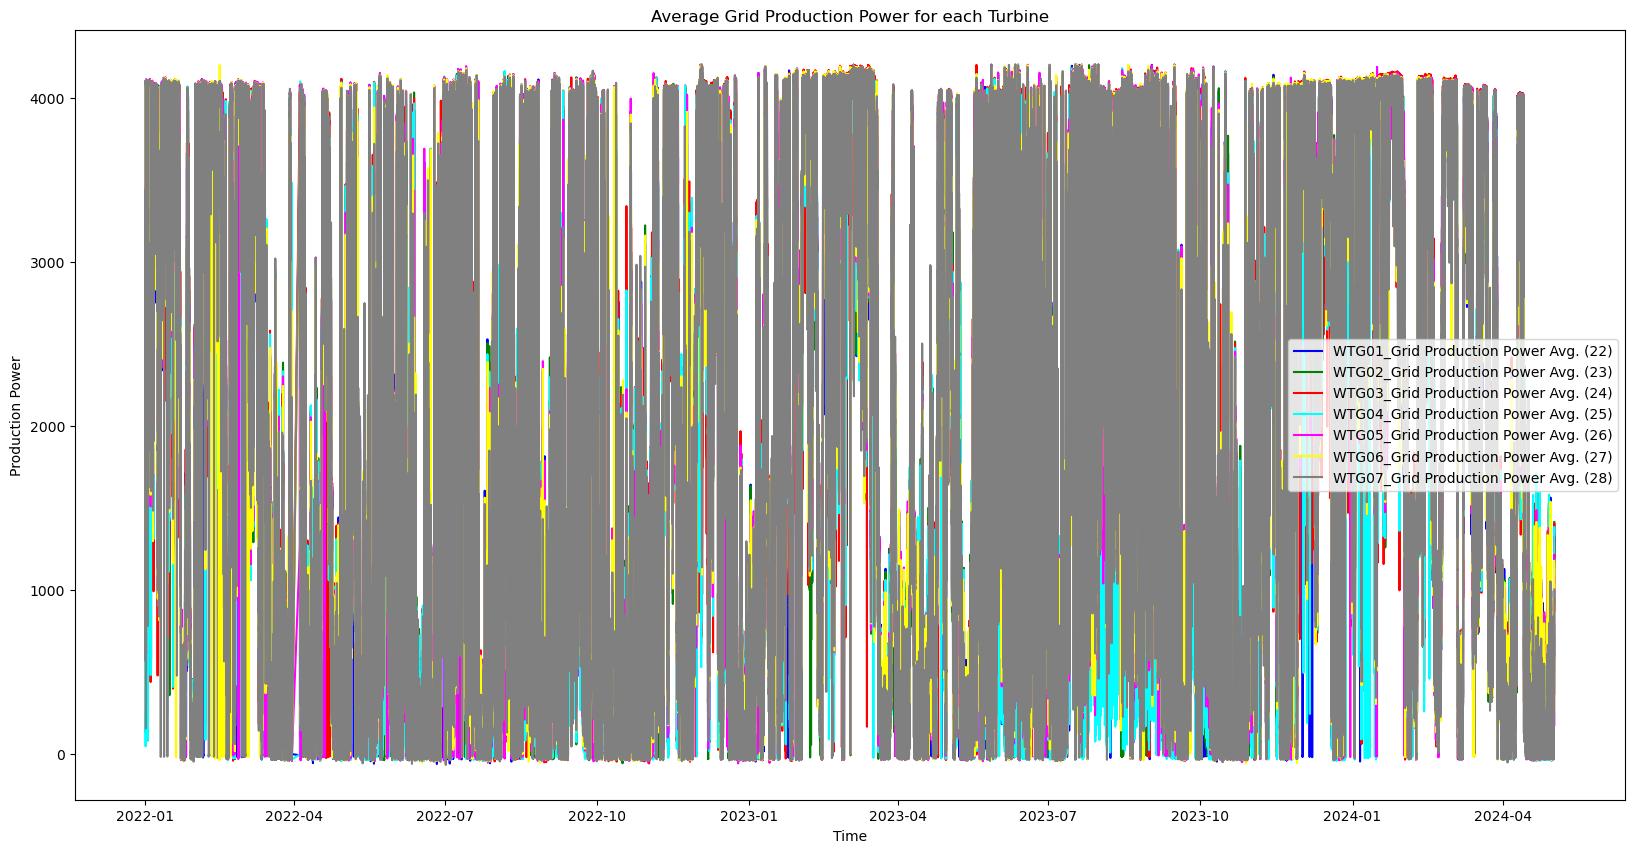

In [16]:
# Average Grid Production Power for each Turbine
plt.figure(figsize=(20,10))

turbines = ['WTG01_Grid Production Power Avg. (22)',
            'WTG02_Grid Production Power Avg. (23)',
            'WTG03_Grid Production Power Avg. (24)',
            'WTG04_Grid Production Power Avg. (25)',
            'WTG05_Grid Production Power Avg. (26)',
            'WTG06_Grid Production Power Avg. (27)',
            'WTG07_Grid Production Power Avg. (28)']

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray']

for turbine, color in zip(turbines, colors):
    plt.plot(dfs['PCTimeStamp'],dfs[turbine], color=color, label=turbine)
    #plt.scatter(dfs[turbine], color=color, label=turbine)

plt.title('Average Grid Production Power for each Turbine')
plt.xlabel('Time')
plt.ylabel('Production Power')
plt.legend(loc='best')
plt.show()

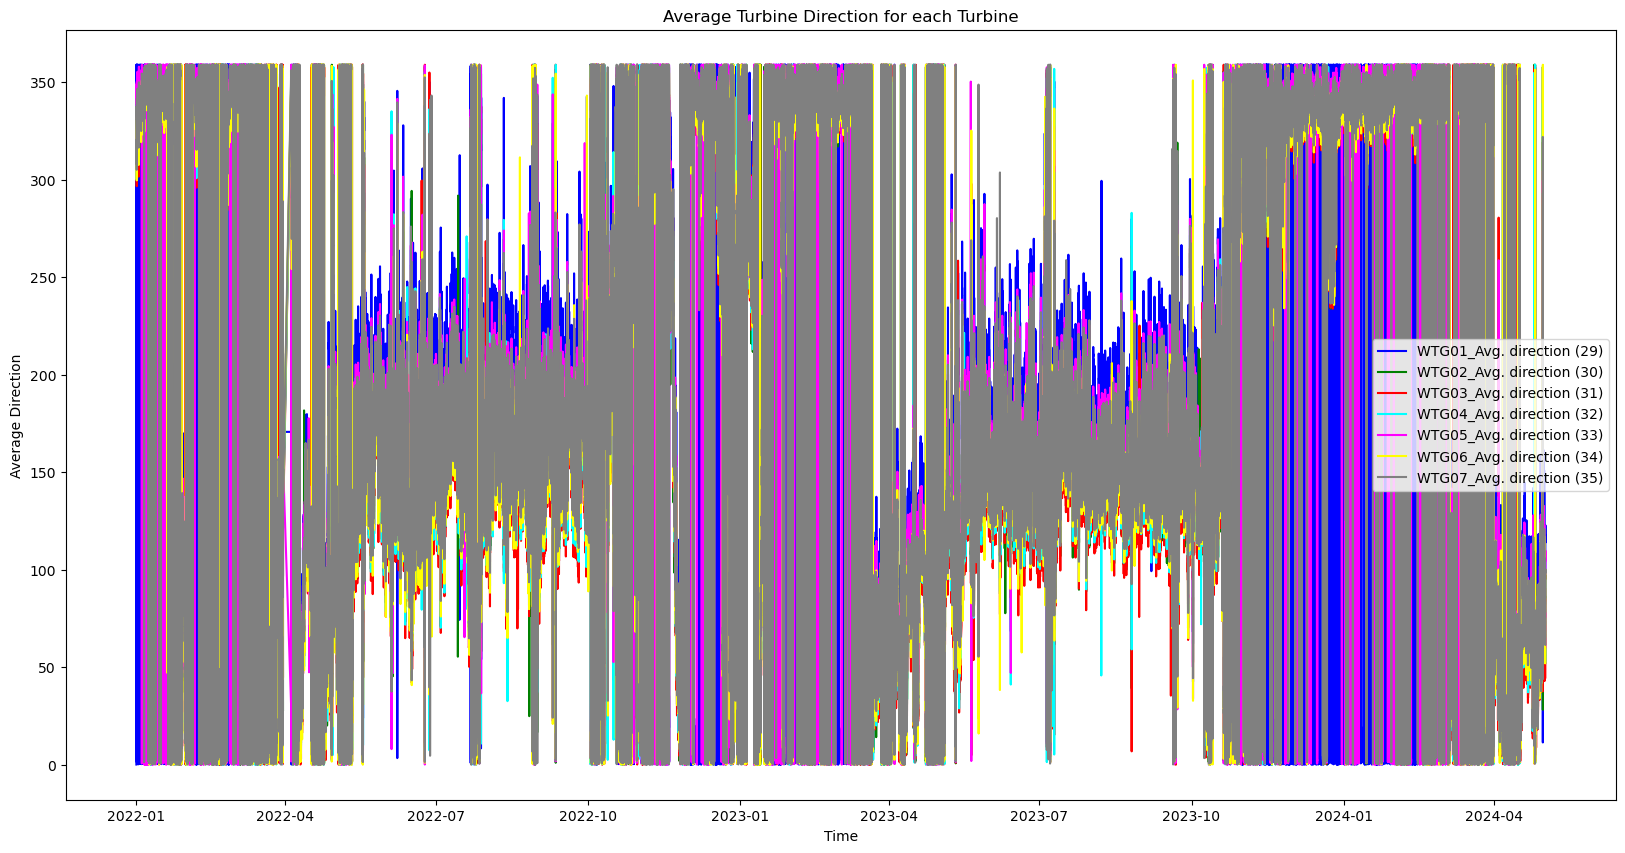

In [17]:
# Average Turbine Direction for each Turbine
plt.figure(figsize=(20,10))

turbines = ['WTG01_Avg. direction (29)',
            'WTG02_Avg. direction (30)',
            'WTG03_Avg. direction (31)',
            'WTG04_Avg. direction (32)',
            'WTG05_Avg. direction (33)',
            'WTG06_Avg. direction (34)',
            'WTG07_Avg. direction (35)']

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray']

for turbine, color in zip(turbines, colors):
    plt.plot(dfs['PCTimeStamp'],dfs[turbine], color=color, label=turbine)
    #plt.scatter(dfs[turbine], color=color, label=turbine)

plt.title('Average Turbine Direction for each Turbine')
plt.xlabel('Time')
plt.ylabel('Average Direction')
plt.legend(loc='best')
plt.show()

---
### **4. Correlation Between Features**

Based on the graphs, we observe that the Wind Direction and Turbine Direction graphs are **quite similar**. Therefore, we will calculate the correlation between the Wind Direction and Turbine Direction for each corresponding turbine.

<Axes: xlabel='0', ylabel='0'>

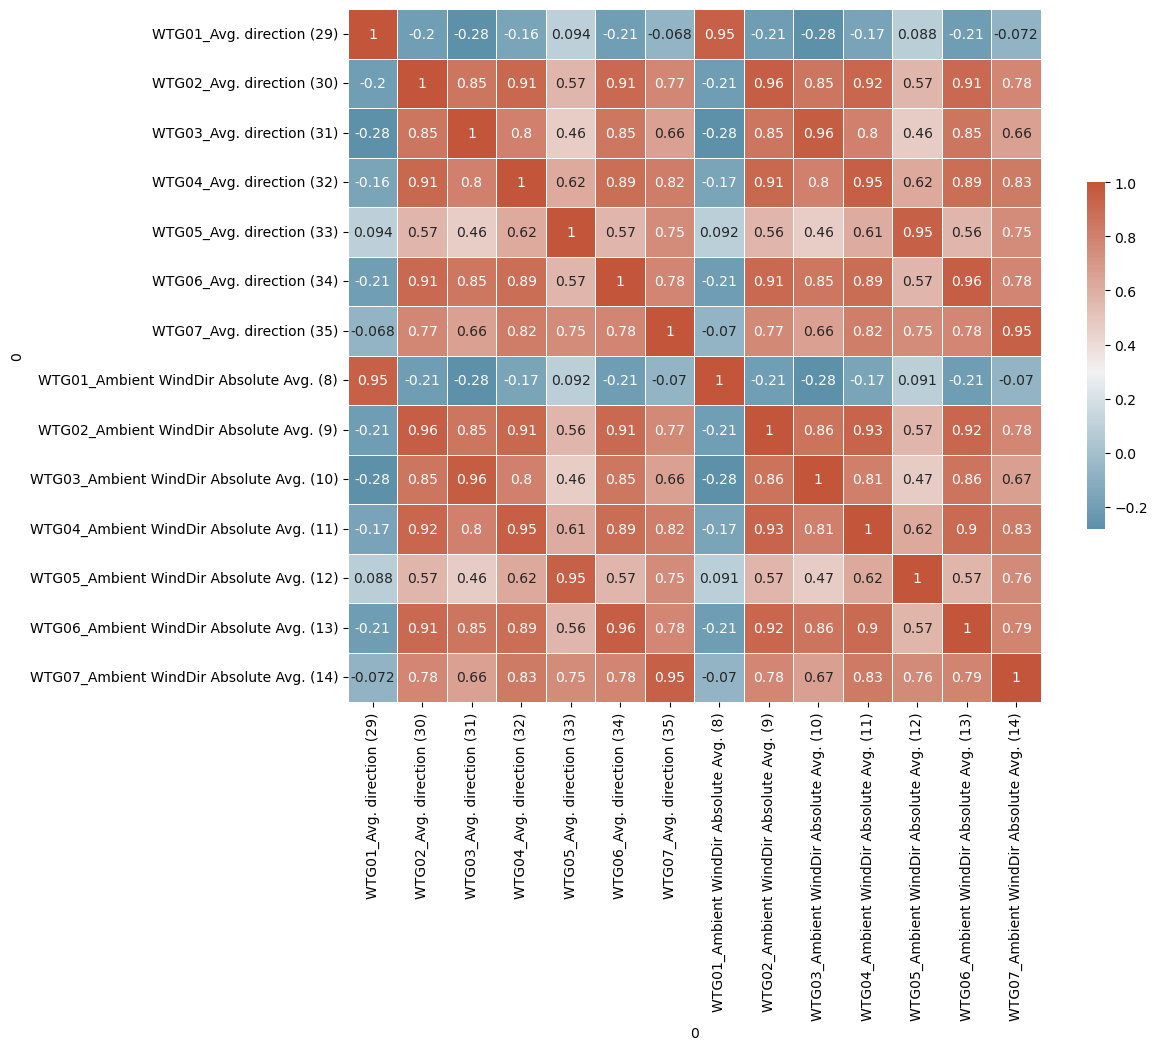

In [18]:
# Draw the heatmap correlation between Ambient Wind Speed and Grid Production Power

turbine_dir = ['WTG01_Avg. direction (29)', 'WTG02_Avg. direction (30)', 'WTG03_Avg. direction (31)', 
         'WTG04_Avg. direction (32)', 'WTG05_Avg. direction (33)', 'WTG06_Avg. direction (34)', 
         'WTG07_Avg. direction (35)']

wind_dir = ['WTG01_Ambient WindDir Absolute Avg. (8)', 'WTG02_Ambient WindDir Absolute Avg. (9)', 
         'WTG03_Ambient WindDir Absolute Avg. (10)', 'WTG04_Ambient WindDir Absolute Avg. (11)', 
         'WTG05_Ambient WindDir Absolute Avg. (12)', 'WTG06_Ambient WindDir Absolute Avg. (13)', 
         'WTG07_Ambient WindDir Absolute Avg. (14)']

cols_dir = turbine_dir + wind_dir
corr = dfs[cols_dir].corr()
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1, center=0.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

**Comments:**

    The correlation between Wind Direction and Turbine Direction for each corresponding turbine being consistently above 0.94 indicates a strong positive linear relationship between these two variables. This suggests that the turbines are effectively aligned with the prevailing wind direction, which is crucial for maximizing energy production efficiency. High correlation values imply that changes in wind direction are closely mirrored by changes in turbine direction, highlighting an optimal orientation strategy that enhances the turbines' ability to capture wind energy.

    Sự tương quan cao (trên 0.94) giữa Hướng Gió và Hướng Turbin của mỗi turbin tương ứng cho thấy mối quan hệ tuyến tính rất mạnh giữa hai biến này. Điều này cho thấy rằng các turbin được căn chỉnh hiệu quả theo hướng gió chủ đạo, điều này rất quan trọng để tối ưu hóa hiệu suất sản xuất năng lượng. Các giá trị tương quan cao ngụ ý rằng các thay đổi trong hướng gió được phản ánh chặt chẽ bởi các thay đổi trong hướng của turbin, làm nổi bật chiến lược căn chỉnh tối ưu giúp tăng cường khả năng thu nhận năng lượng gió của các turbin.

In [19]:
dfs_turbine = dfs.copy()
turbine_dfs = {}

for i in range(1, 8):
    columns = [f'WTG0{i}_Ambient WindSpeed Avg. ({i})',
               f'WTG0{i}_Ambient WindDir Absolute Avg. ({i+7})',
               f'WTG0{i}_Ambient Temp. Avg. ({i+14})',
               f'WTG0{i}_Grid Production Power Avg. ({i+21})',
               f'WTG0{i}_Avg. direction ({i+28})']
    columns = ['PCTimeStamp', 'Week', 'Month', 'Seasons', 'Day', 'Hour'] + columns
    turbine_dfs[f'dfs_turbine{i}'] = dfs_turbine[columns]

    # Add the 'angular deviation' column
    deviation = (turbine_dfs[f'dfs_turbine{i}'][f'WTG0{i}_Ambient WindDir Absolute Avg. ({i+7})'] 
                 - turbine_dfs[f'dfs_turbine{i}'][f'WTG0{i}_Avg. direction ({i+28})']) % 360
    turbine_dfs[f'dfs_turbine{i}'][f'WTG0{i}_Angular Deviation Abs'] = deviation.where(deviation <= 180, 360 - deviation)

dfs_turbine1, dfs_turbine2, dfs_turbine3, dfs_turbine4, dfs_turbine5, dfs_turbine6, dfs_turbine7 = [turbine_dfs[f'dfs_turbine{i}'] for i in range(1, 8)]

In [20]:
dfs_turbine1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121067 entries, 0 to 122687
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   PCTimeStamp                              121067 non-null  datetime64[ns]
 1   Week                                     121067 non-null  int32         
 2   Month                                    121067 non-null  int32         
 3   Seasons                                  121067 non-null  object        
 4   Day                                      121067 non-null  int32         
 5   Hour                                     121067 non-null  int32         
 6   WTG01_Ambient WindSpeed Avg. (1)         121067 non-null  float64       
 7   WTG01_Ambient WindDir Absolute Avg. (8)  121067 non-null  float64       
 8   WTG01_Ambient Temp. Avg. (15)            121067 non-null  float64       
 9   WTG01_Grid Production Power Avg

0                                        WTG01_Ambient WindSpeed Avg. (1)  \
0                                                                           
WTG01_Ambient WindSpeed Avg. (1)                                 1.000000   
WTG01_Ambient WindDir Absolute Avg. (8)                         -0.291691   
WTG01_Ambient Temp. Avg. (15)                                   -0.238785   
WTG01_Grid Production Power Avg. (22)                            0.922736   
WTG01_Avg. direction (29)                                       -0.293796   
WTG01_Angular Deviation Abs                                     -0.222021   

0                                        WTG01_Ambient WindDir Absolute Avg. (8)  \
0                                                                                  
WTG01_Ambient WindSpeed Avg. (1)                                       -0.291691   
WTG01_Ambient WindDir Absolute Avg. (8)                                 1.000000   
WTG01_Ambient Temp. Avg. (15)                                           0.033757   
WTG01_Grid Production Power Avg. (22)                                  -0.302078   
WTG01_Avg. direction (29)                                               0.947405   
WTG01_Angular Deviation Abs                                             0.072651   

0                                        WTG01_Ambient Temp. Avg. (15)  \
0                                                                        
WTG01_Ambient WindSpeed Avg. (1)                             -0.238785   
WTG01_Ambient WindDir Absolute Avg. (8)                       0.033757   
WTG01_Ambient Temp. Avg. (15)                                 1.000000   
WTG01_Grid Production Power Avg. (22)                        -0.209229   
WTG01_Avg. direction (29)                                     0.034880   
WTG01_Angular Deviation Abs                                   0.020820   

0                                        WTG01_Grid Production Power Avg. (22)  \
0                                                                                
WTG01_Ambient WindSpeed Avg. (1)                                      0.922736   
WTG01_Ambient WindDir Absolute Avg. (8)                              -0.302078   
WTG01_Ambient Temp. Avg. (15)                                        -0.209229   
WTG01_Grid Production Power Avg. (22)                                 1.000000   
WTG01_Avg. direction (29)                                            -0.303517   
WTG01_Angular Deviation Abs                                          -0.189004   

0                                        WTG01_Avg. direction (29)  \
0                                                                    
WTG01_Ambient WindSpeed Avg. (1)                         -0.293796   
WTG01_Ambient WindDir Absolute Avg. (8)                   0.947405   
WTG01_Ambient Temp. Avg. (15)                             0.034880   
WTG01_Grid Production Power Avg. (22)                    -0.303517   
WTG01_Avg. direction (29)                                 1.000000   
WTG01_Angular Deviation Abs                               0.117154   

0                                        WTG01_Angular Deviation Abs  
0                                                                     
WTG01_Ambient WindSpeed Avg. (1)                           -0.222021  
WTG01_Ambient WindDir Absolute Avg. (8)                     0.072651  
WTG01_Ambient Temp. Avg. (15)                               0.020820  
WTG01_Grid Production Power Avg. (22)                      -0.189004  
WTG01_Avg. direction (29)                                   0.117154  
WTG01_Angular Deviation Abs                                 1.000000

<Figure size 3000x3000 with 0 Axes>

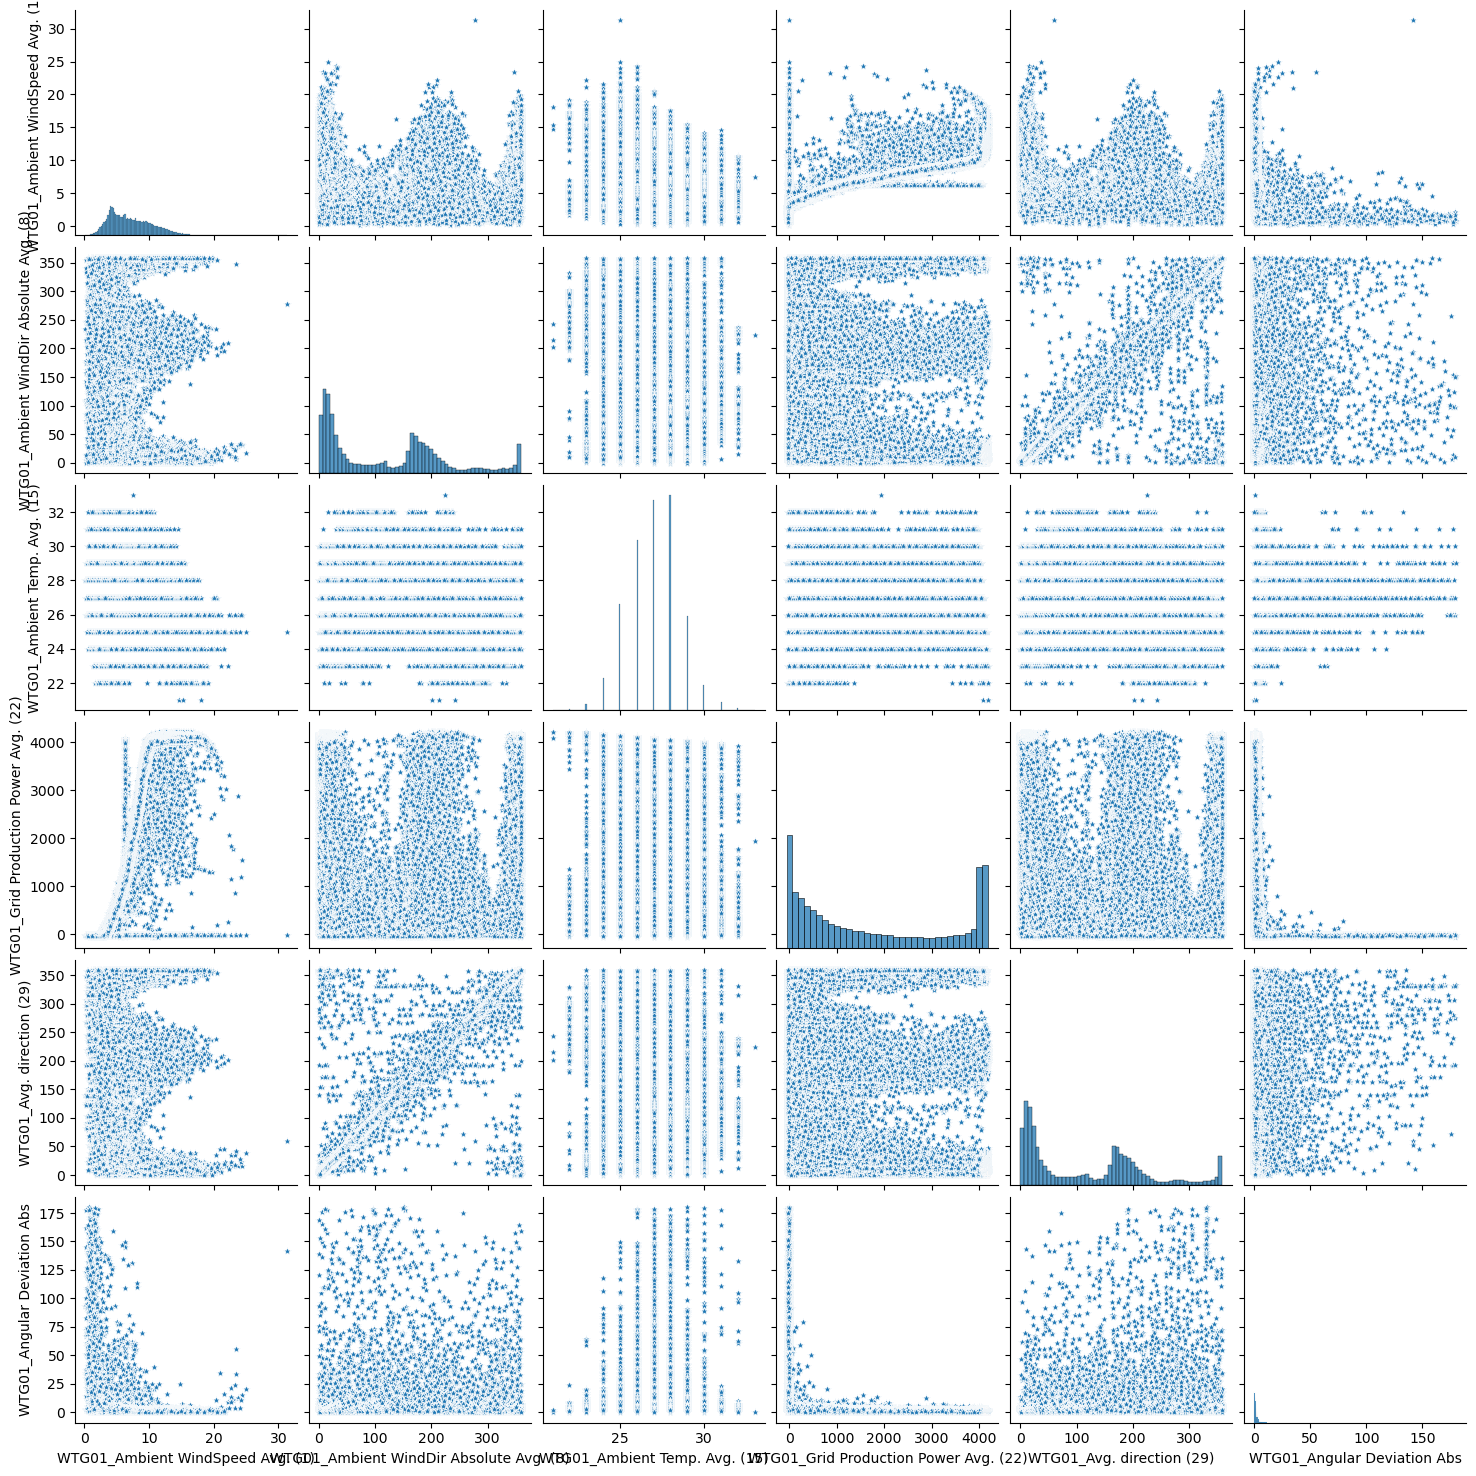

In [21]:
display(dfs_turbine1.iloc[:,6:12].corr())
plt.figure(figsize=(30, 30))
sns.pairplot(dfs_turbine1.iloc[:,6:12], markers='*')

Temperture is irrelevant to production power (not correlation)

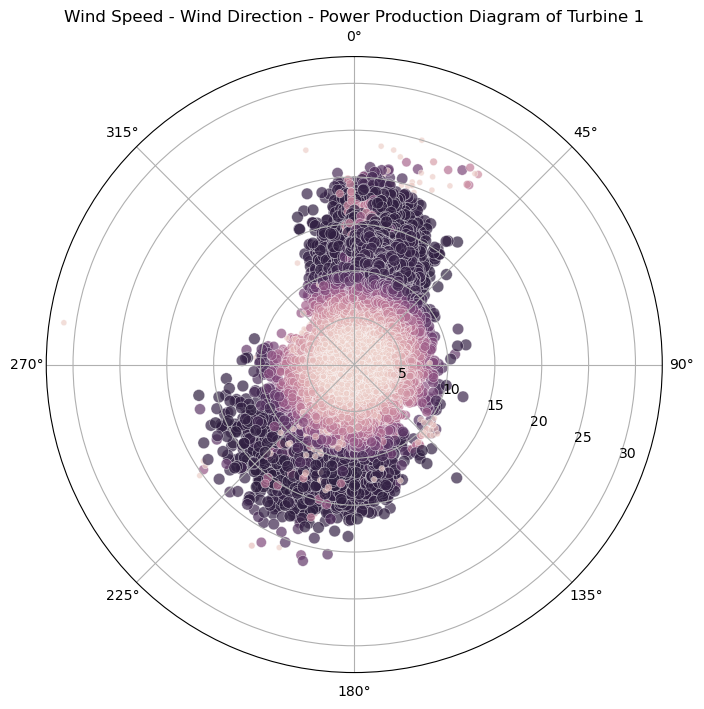

In [22]:
# Creating the polar diagram
from math import radians

def polar_diagram(dfs, j ): # j is the turbine number
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # Inside circles are the wind speed and marker color and size represents the amount of power production
    sns.scatterplot(x=[radians(x) for x in dfs[f'WTG0{j}_Ambient WindDir Absolute Avg. ({j+7})']], 
                    y=dfs[f'WTG0{j}_Ambient WindSpeed Avg. ({j})'],
                    size=dfs[f'WTG0{j}_Grid Production Power Avg. ({j+21})'],
                    hue=dfs[f'WTG0{j}_Grid Production Power Avg. ({j+21})'],
                    alpha=0.7, legend=None)

    # Setting the polar diagram's top represents the North 
    ax.set_theta_zero_location('N')
    # Setting -1 to start the wind direction clockwise
    ax.set_theta_direction(-1)
    # Setting wind speed labels in a better position to see
    ax.set_rlabel_position(110)
    plt.title(f'Wind Speed - Wind Direction - Power Production Diagram of Turbine {j}')
    plt.ylabel(None)

polar_diagram(dfs_turbine1, 1)

In [23]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 45=NE 60=NEE etc.
def find_direction(x):
    directions = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    index = round(x / 22.5) % 16
    return directions[int(index)]

#   Column                                   Non-Null Count  Dtype         
# ---  ------                                   --------------  -----         
#  0   PCTimeStamp                              52446 non-null  datetime64[ns]
#  1   Week                                     52446 non-null  int32         
#  2   Month                                    52446 non-null  int32         
#  3   Seasons                                  52446 non-null  object        
#  4   Day                                      52446 non-null  int32         
#  5   Hour                                     52446 non-null  int32         
#  6   WTG01_Ambient WindSpeed Avg. (1)         52446 non-null  float64       
#  7   WTG01_Ambient WindDir Absolute Avg. (8)  52446 non-null  float64       
#  8   WTG01_Ambient Temp. Avg. (15)            52446 non-null  float64       
#  9   WTG01_Grid Production Power Avg. (22)    52446 non-null  float64       
#  10  WTG01_Avg. direction (29)                52446 non-null  float64       
#  11  WTG01_Angular Deviation Abs              52446 non-null  float64     

# def direction_maxPower(dfs_turbinej): # j is the turbine number
#     #create summary direction dataframe from clean data.
#     dfs_turbinej["Direction"]=dfs_turbinej.iloc[:, 7].apply(find_direction)
#     DepGroupT_direction = dfs_turbinej.groupby("Direction")
#     data_T_direction=DepGroupT_direction.mean()
#     #remove the unnecessary columns.
#     data_T_direction.drop(columns={"WindSpeed(m/s)","Wind_Direction"},inplace=True)
#     #create a column from index.
#     listTdirection_Dir=data_T_direction.index.copy()
#     data_T_direction["Direction"]=listTdirection_Dir
#     #change the name of mean_WindSpeed column as  WindSpeed.
#     data_T_direction["WindSpeed(m/s)"]=data_T_direction["mean_WindSpeed"]
#     data_T_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#     #change the place of columns.
#     data_T_direction=data_T_direction[["Direction","mean_Direction","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
#                                         "Loss_Value(kW)","Loss(%)"]]
#     #change the index numbers.
#     data_T_direction["Index"]=list(range(1,len(data_T_direction.index)+1))
#     data_T_direction.set_index("Index",inplace=True)
#     #create a count column that shows the number of directions from clean data.
#     data_T_direction["count"]=[len(dfs_turbinej["Direction"][dfs_turbinej["Direction"]==i]) 
#                             for i in data_T_direction["Direction"]]
#     #round the values to 2 digit
#     data_T_direction=data_T_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
#                                             'Loss_Value(kW)': 2, 'Loss(%)': 2})
#     #sort by mean_Direction
#     data_T_direction=data_T_direction.sort_values("mean_Direction")
#     data_T_direction.drop(columns={"mean_Direction"},inplace=True)

We can see that the wind turbine produces more power if the wind blows from the directions between 315-45 and 135-270 degrees.

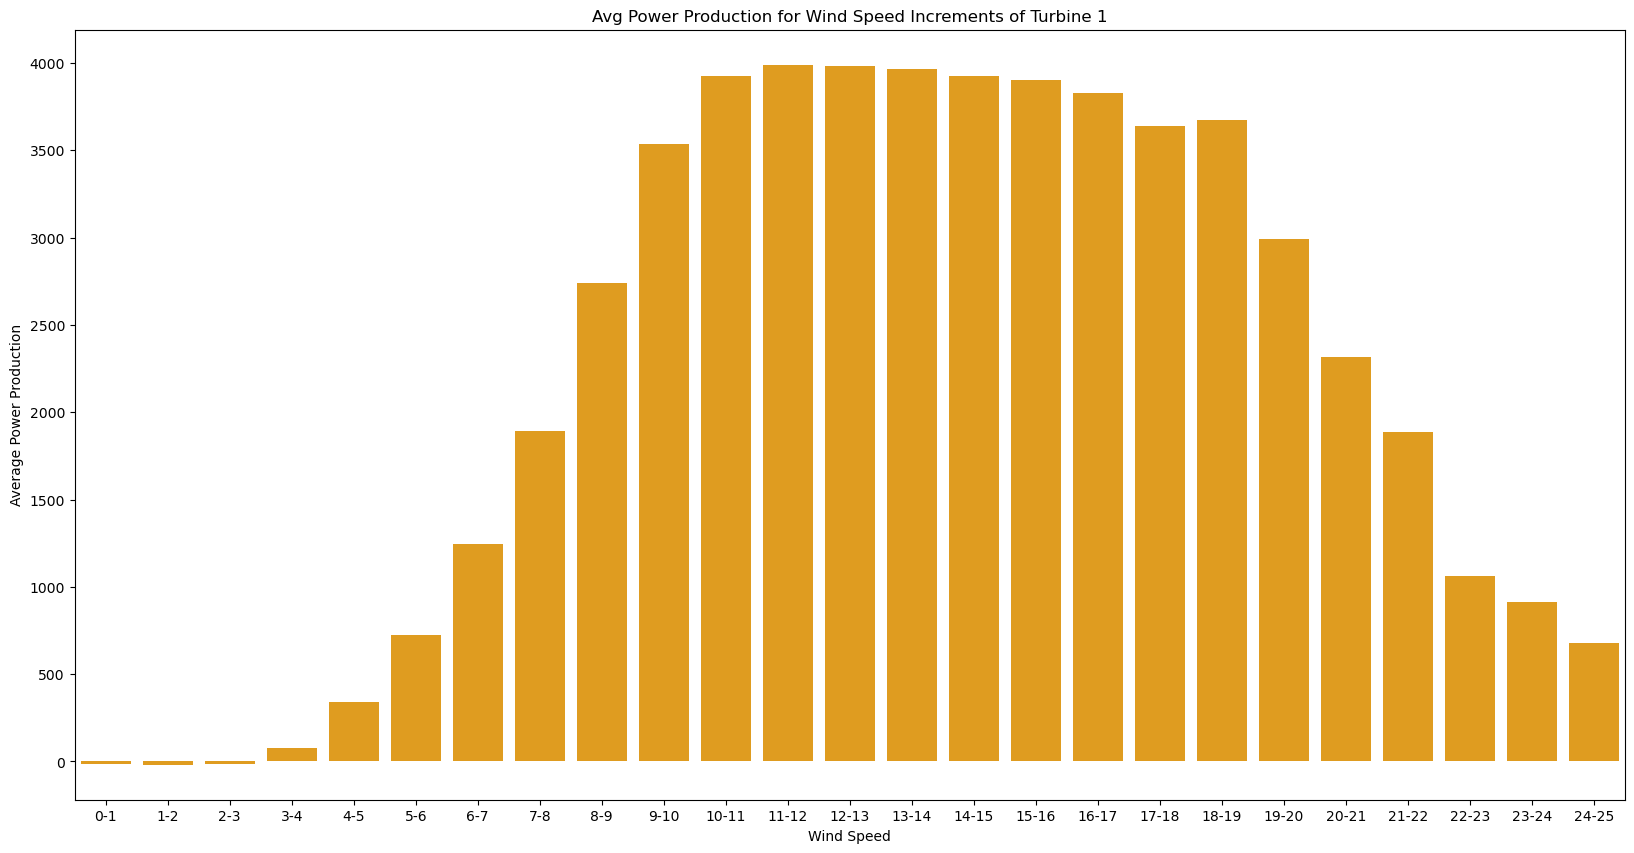

In [24]:
# Finding average power production for wind speed increments
def power_vs_wind_speed(dfs, j): # j is the turbine number
    wind_speed = []
    avg_power = []
    for i in range(0, 25):
        filtered_df = dfs[(dfs[f'WTG0{j}_Ambient WindSpeed Avg. ({j})'] > i) 
                                & (dfs[f'WTG0{j}_Ambient WindSpeed Avg. ({j})'] <= i+1)]
        avg_value = filtered_df[f'WTG0{j}_Grid Production Power Avg. ({j+21})'].mean()
        avg_power.append(avg_value)
        wind_speed.append(str(i) + '-' + str(i+1))

    plt.figure(figsize=(20,10))
    sns.barplot(x=wind_speed, y=avg_power, color='orange')
    plt.title(f'Avg Power Production for Wind Speed Increments of Turbine {j}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power Production')
    plt.show()

power_vs_wind_speed(dfs, 1)

**Comments:**

    From the scatter plot between wind speed and Production Power Curve, we see that Wind Turbines Systems can't generate any power if the wind speed is less than 3 m/s

    When the wind speed is larger than 3 m/s to 11 m/s, the relation between them are linear meaning that increasing the wind speed, allows turbines to generate more power

    After the wind speed passes 11 m/s, the power generated is saturated on 4000 KWh

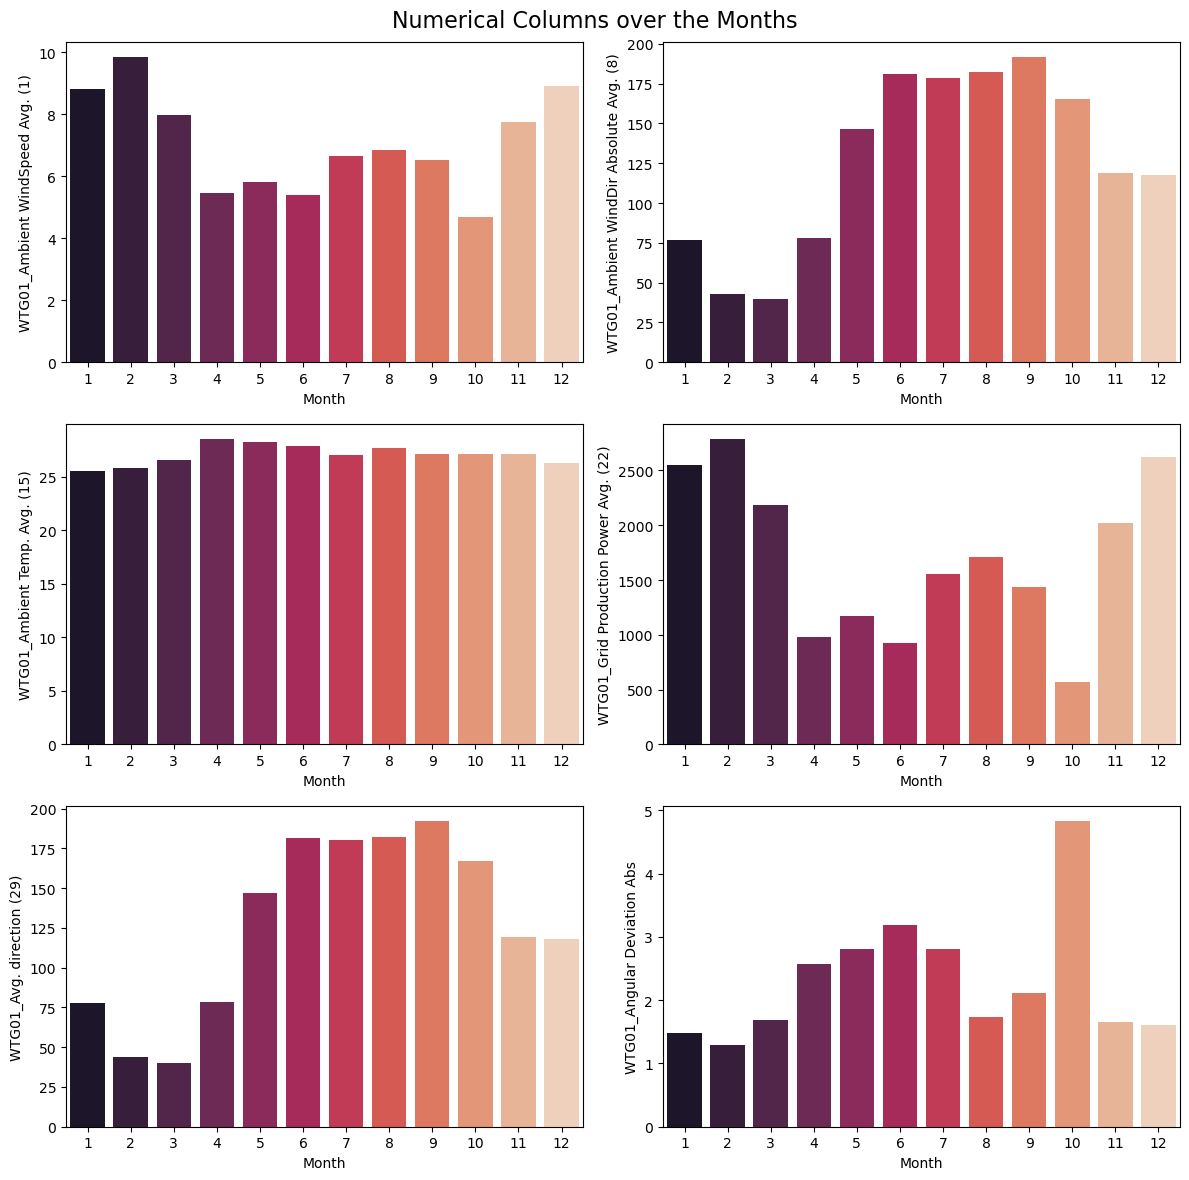

In [25]:
fig,axes=plt.subplots(nrows=3 ,ncols=2,figsize=(12,12))
for idx,col in enumerate(dfs_turbine1.iloc[:,6:12]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=dfs_turbine1['Month'],y=dfs_turbine1[col],data=dfs_turbine1,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Months', fontsize=16)
plt.tight_layout()
plt.show() 

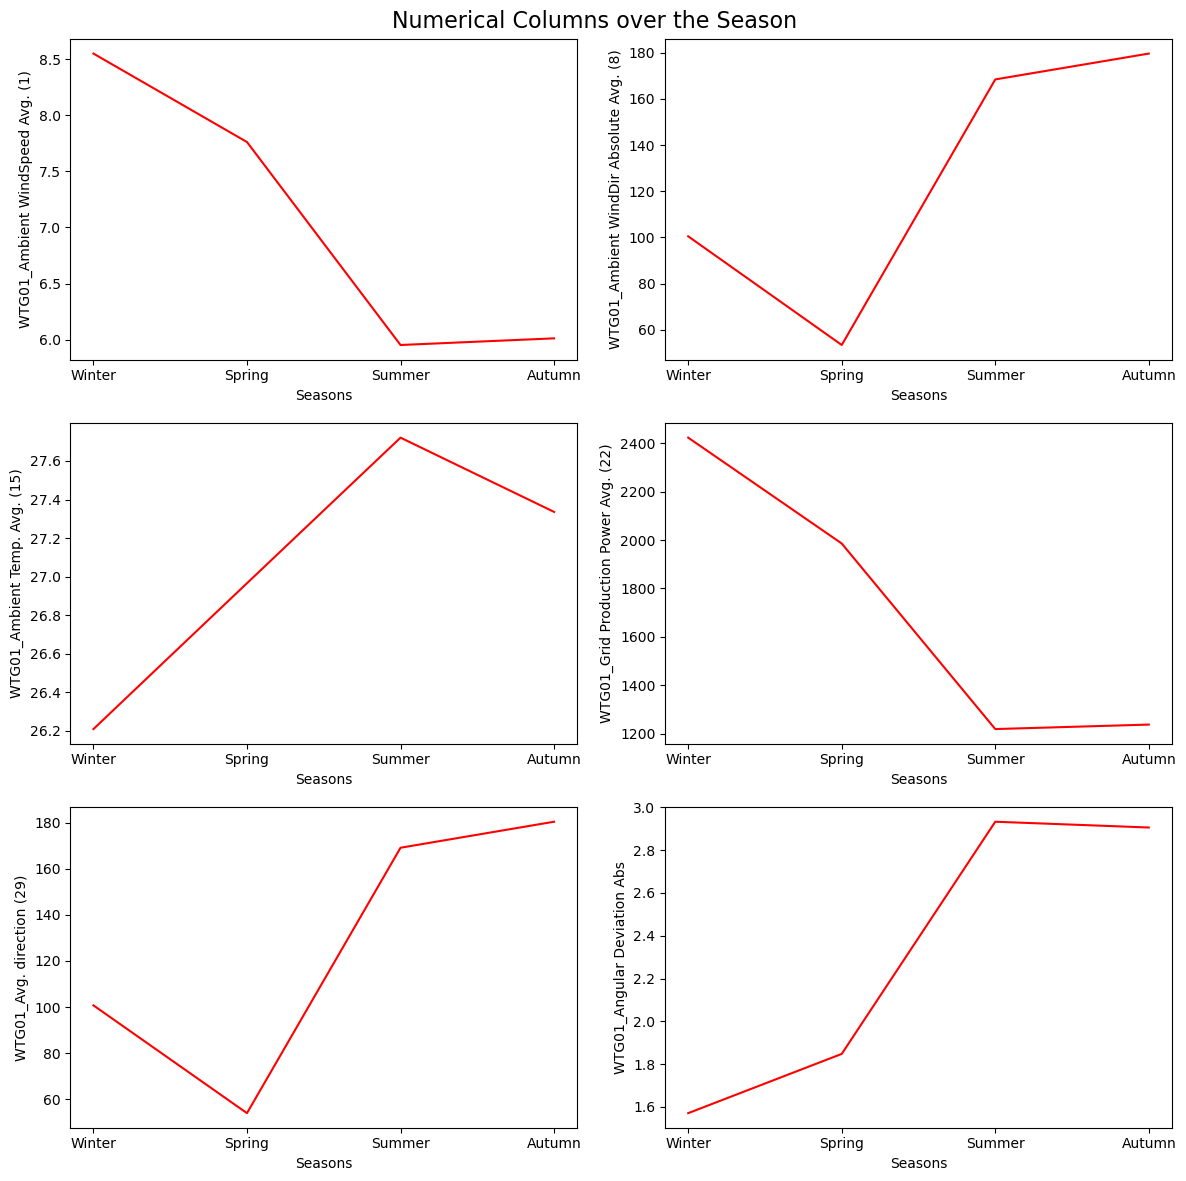

In [26]:
fig,axes=plt.subplots(nrows=3 ,ncols=2,figsize=(12,12))
for idx,col in enumerate(dfs_turbine1.iloc[:,6:12]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x=dfs_turbine1['Seasons'],y=dfs_turbine1[col],data=dfs_turbine1,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show() 

---
### **5. Shift Power Production**

In [27]:
dfs_shifted = dfs.copy()
turbines_power = ['WTG01_Grid Production Power Avg. (22)',
                    'WTG02_Grid Production Power Avg. (23)',
                    'WTG03_Grid Production Power Avg. (24)',
                    'WTG04_Grid Production Power Avg. (25)',
                    'WTG05_Grid Production Power Avg. (26)',
                    'WTG06_Grid Production Power Avg. (27)',
                    'WTG07_Grid Production Power Avg. (28)']
for turbine in turbines_power:
    dfs_shifted[turbine] = dfs_shifted[turbine].shift(1)

dfs_shifted.iloc[:, 22:28]

0       WTG01_Grid Production Power Avg. (22)  \
0                                         NaN   
1                                    4098.800   
2                                    4094.800   
3                                    4092.900   
4                                    4088.500   
...                                       ...   
122683                               1310.144   
122684                               1197.440   
122685                               1344.640   
122686                               1116.608   
122687                                937.728   

0       WTG02_Grid Production Power Avg. (23)  \
0                                         NaN   
1                                    4090.300   
2                                    4087.000   
3                                    4083.600   
4                                    4079.900   
...                                       ...   
122683                               1213.440   
122684                               1196.672   
122685                               1298.304   
122686                               1351.616   
122687                               1389.568   

0       WTG03_Grid Production Power Avg. (24)  \
0                                         NaN   
1                                    4082.900   
2                                    4083.800   
3                                    4080.600   
4                                    4083.000   
...                                       ...   
122683                               1134.464   
122684                               1271.936   
122685                               1406.912   
122686                               1314.496   
122687                               1210.880   

0       WTG04_Grid Production Power Avg. (25)  \
0                                         NaN   
1                                    3886.000   
2                                    4077.000   
3                                    4081.600   
4                                    4076.000   
...                                       ...   
122683                               1123.840   
122684                               1201.600   
122685                               1383.616   
122686                               1375.744   
122687                               1293.056   

0       WTG05_Grid Production Power Avg. (26)  \
0                                         NaN   
1                                    4097.300   
2                                    4097.000   
3                                    4091.700   
4                                    4095.200   
...                                       ...   
122683                                514.368   
122684                                297.088   
122685                                292.928   
122686                                311.424   
122687                                243.840   

0       WTG06_Grid Production Power Avg. (27)  
0                                         NaN  
1                                    4097.200  
2                                    4095.500  
3                                    4093.800  
4                                    4092.000  
...                                       ...  
122683                                624.256  
122684                                423.424  
122685                                373.376  
122686                                446.080  
122687                                363.264  

[121067 rows x 6 columns]

---
### **6. Boxplot Diagram**

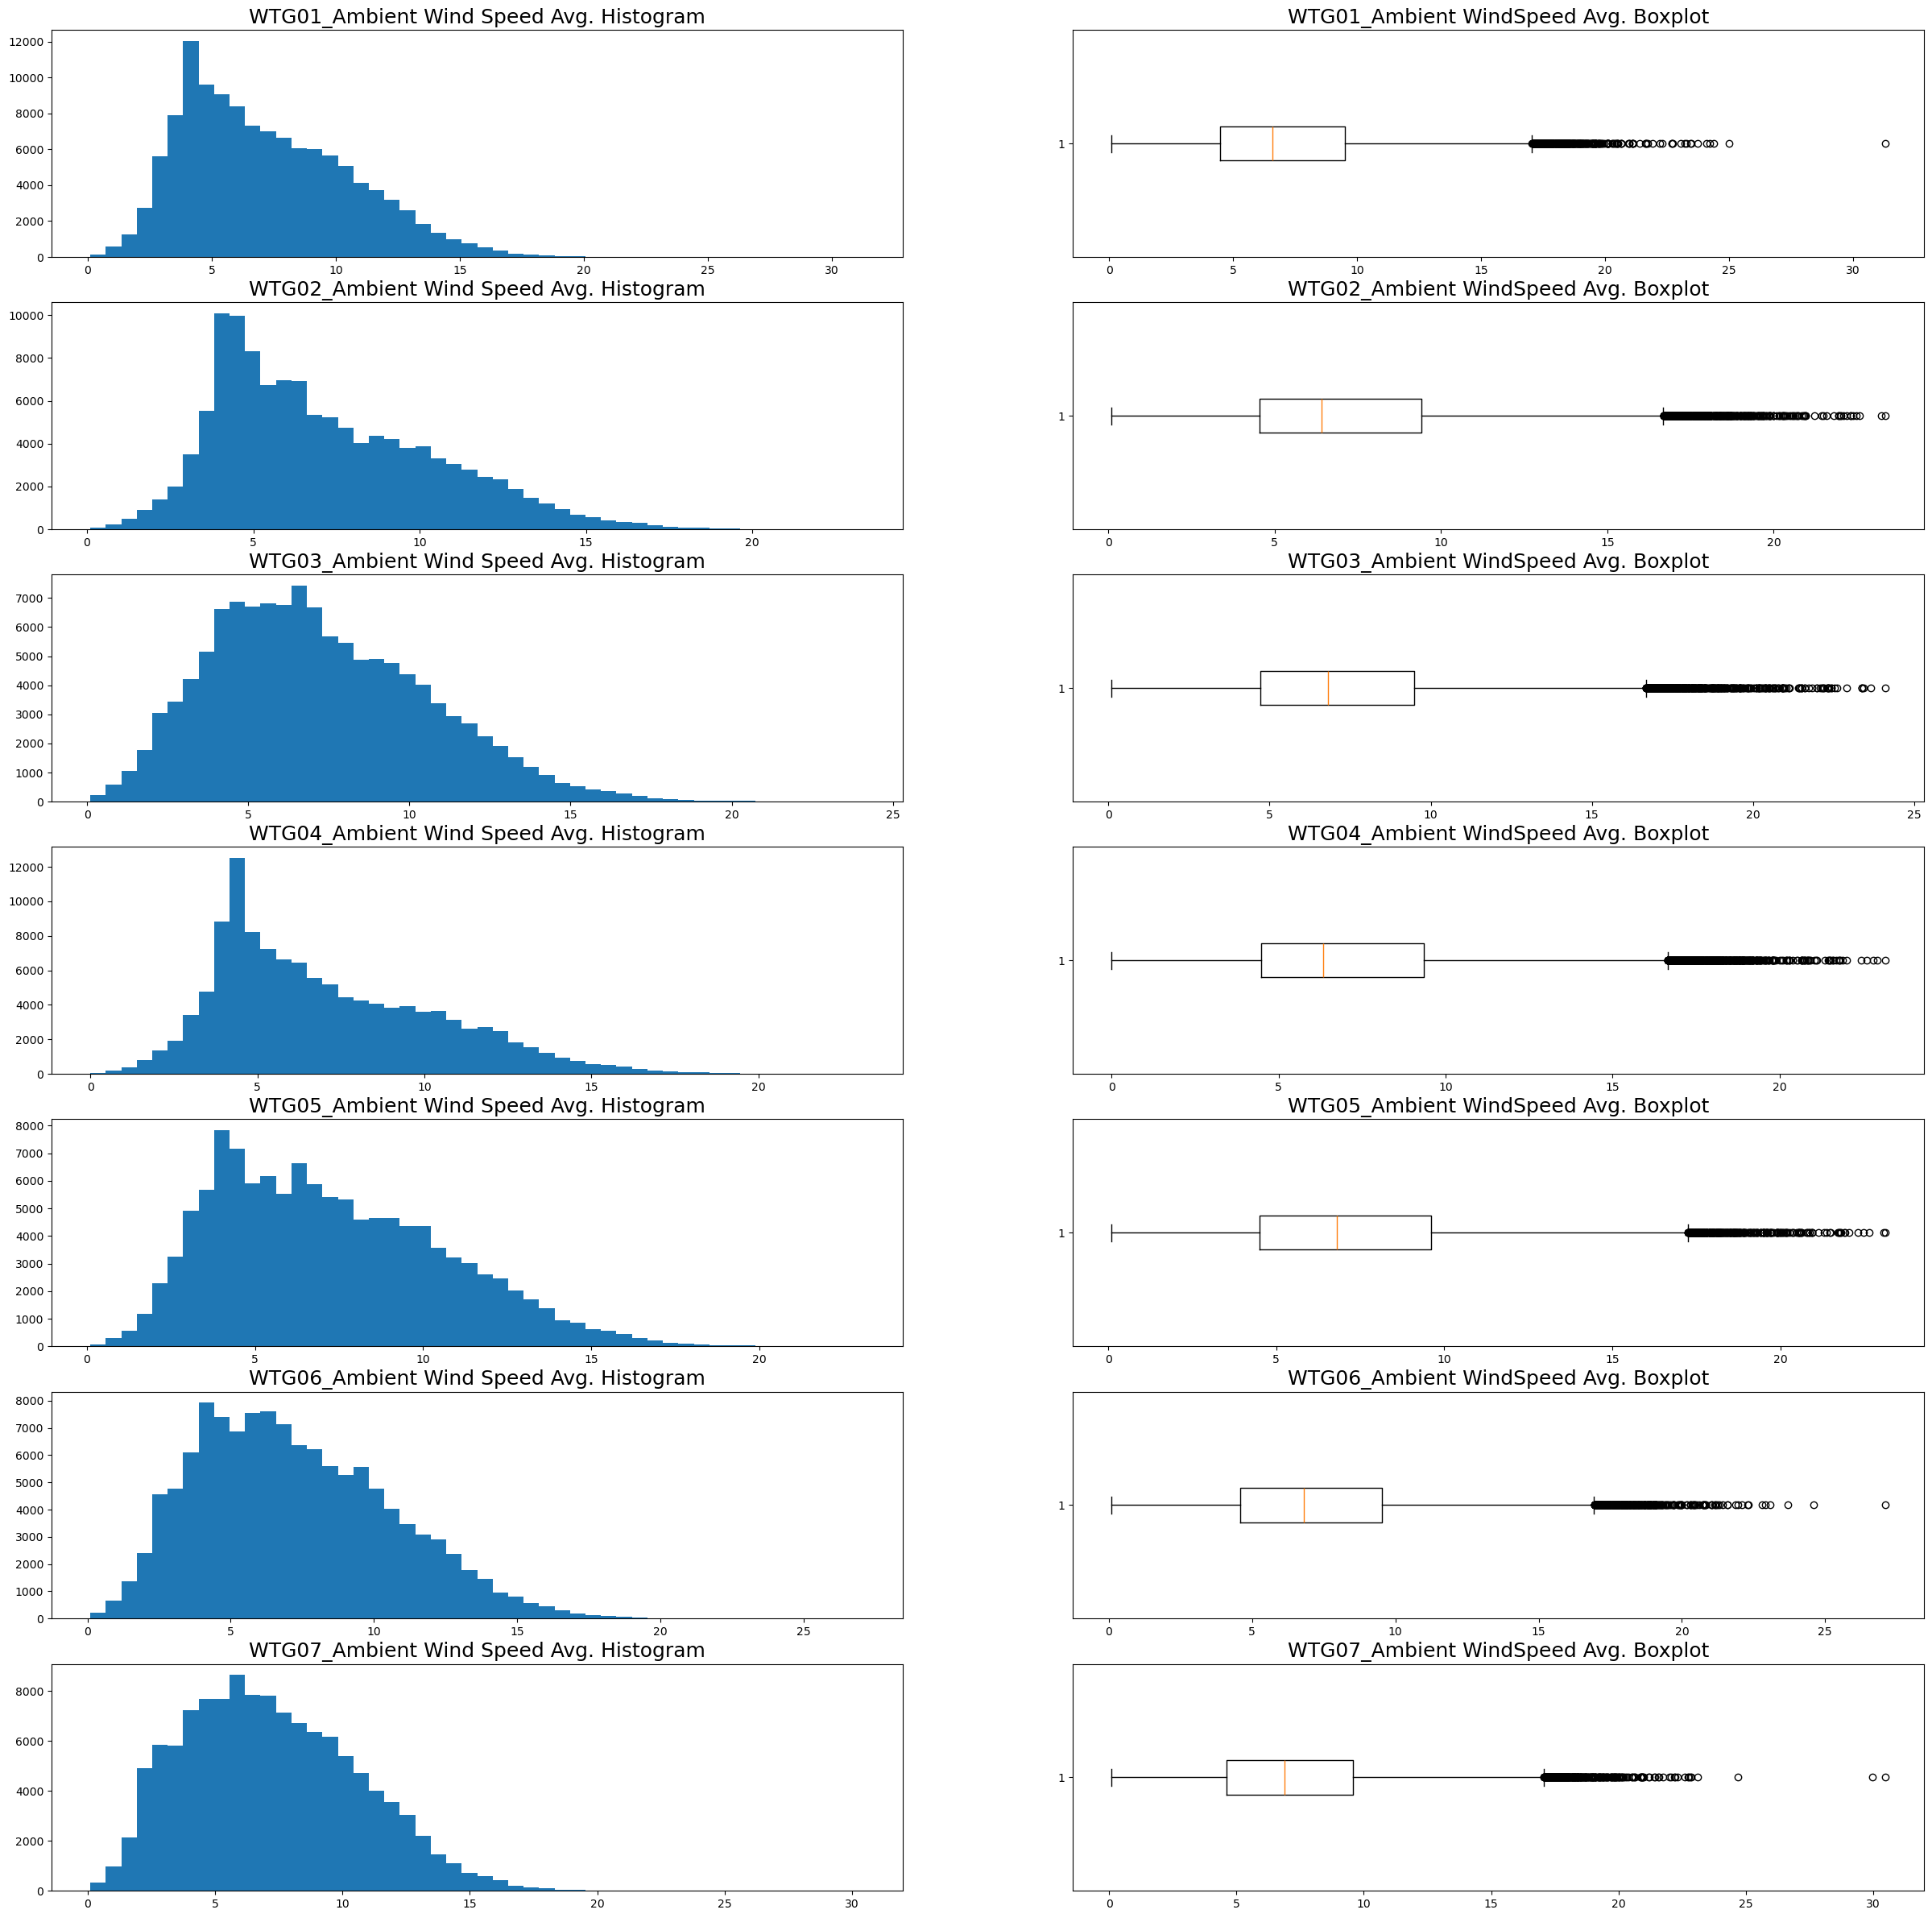

In [28]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(7): 
    ax[i,0].hist(dfs[f'WTG0{i+1}_Ambient WindSpeed Avg. ({i+1})'], bins=50)
    ax[i,0].set_title(f'WTG0{i+1}_Ambient Wind Speed Avg. Histogram', fontsize=18)
    
    ax[i,1].boxplot(dfs[f'WTG0{i+1}_Ambient WindSpeed Avg. ({i+1})'],vert=False)
    ax[i,1].set_title(f'WTG0{i+1}_Ambient WindSpeed Avg. Boxplot', fontsize=18)

plt.show()

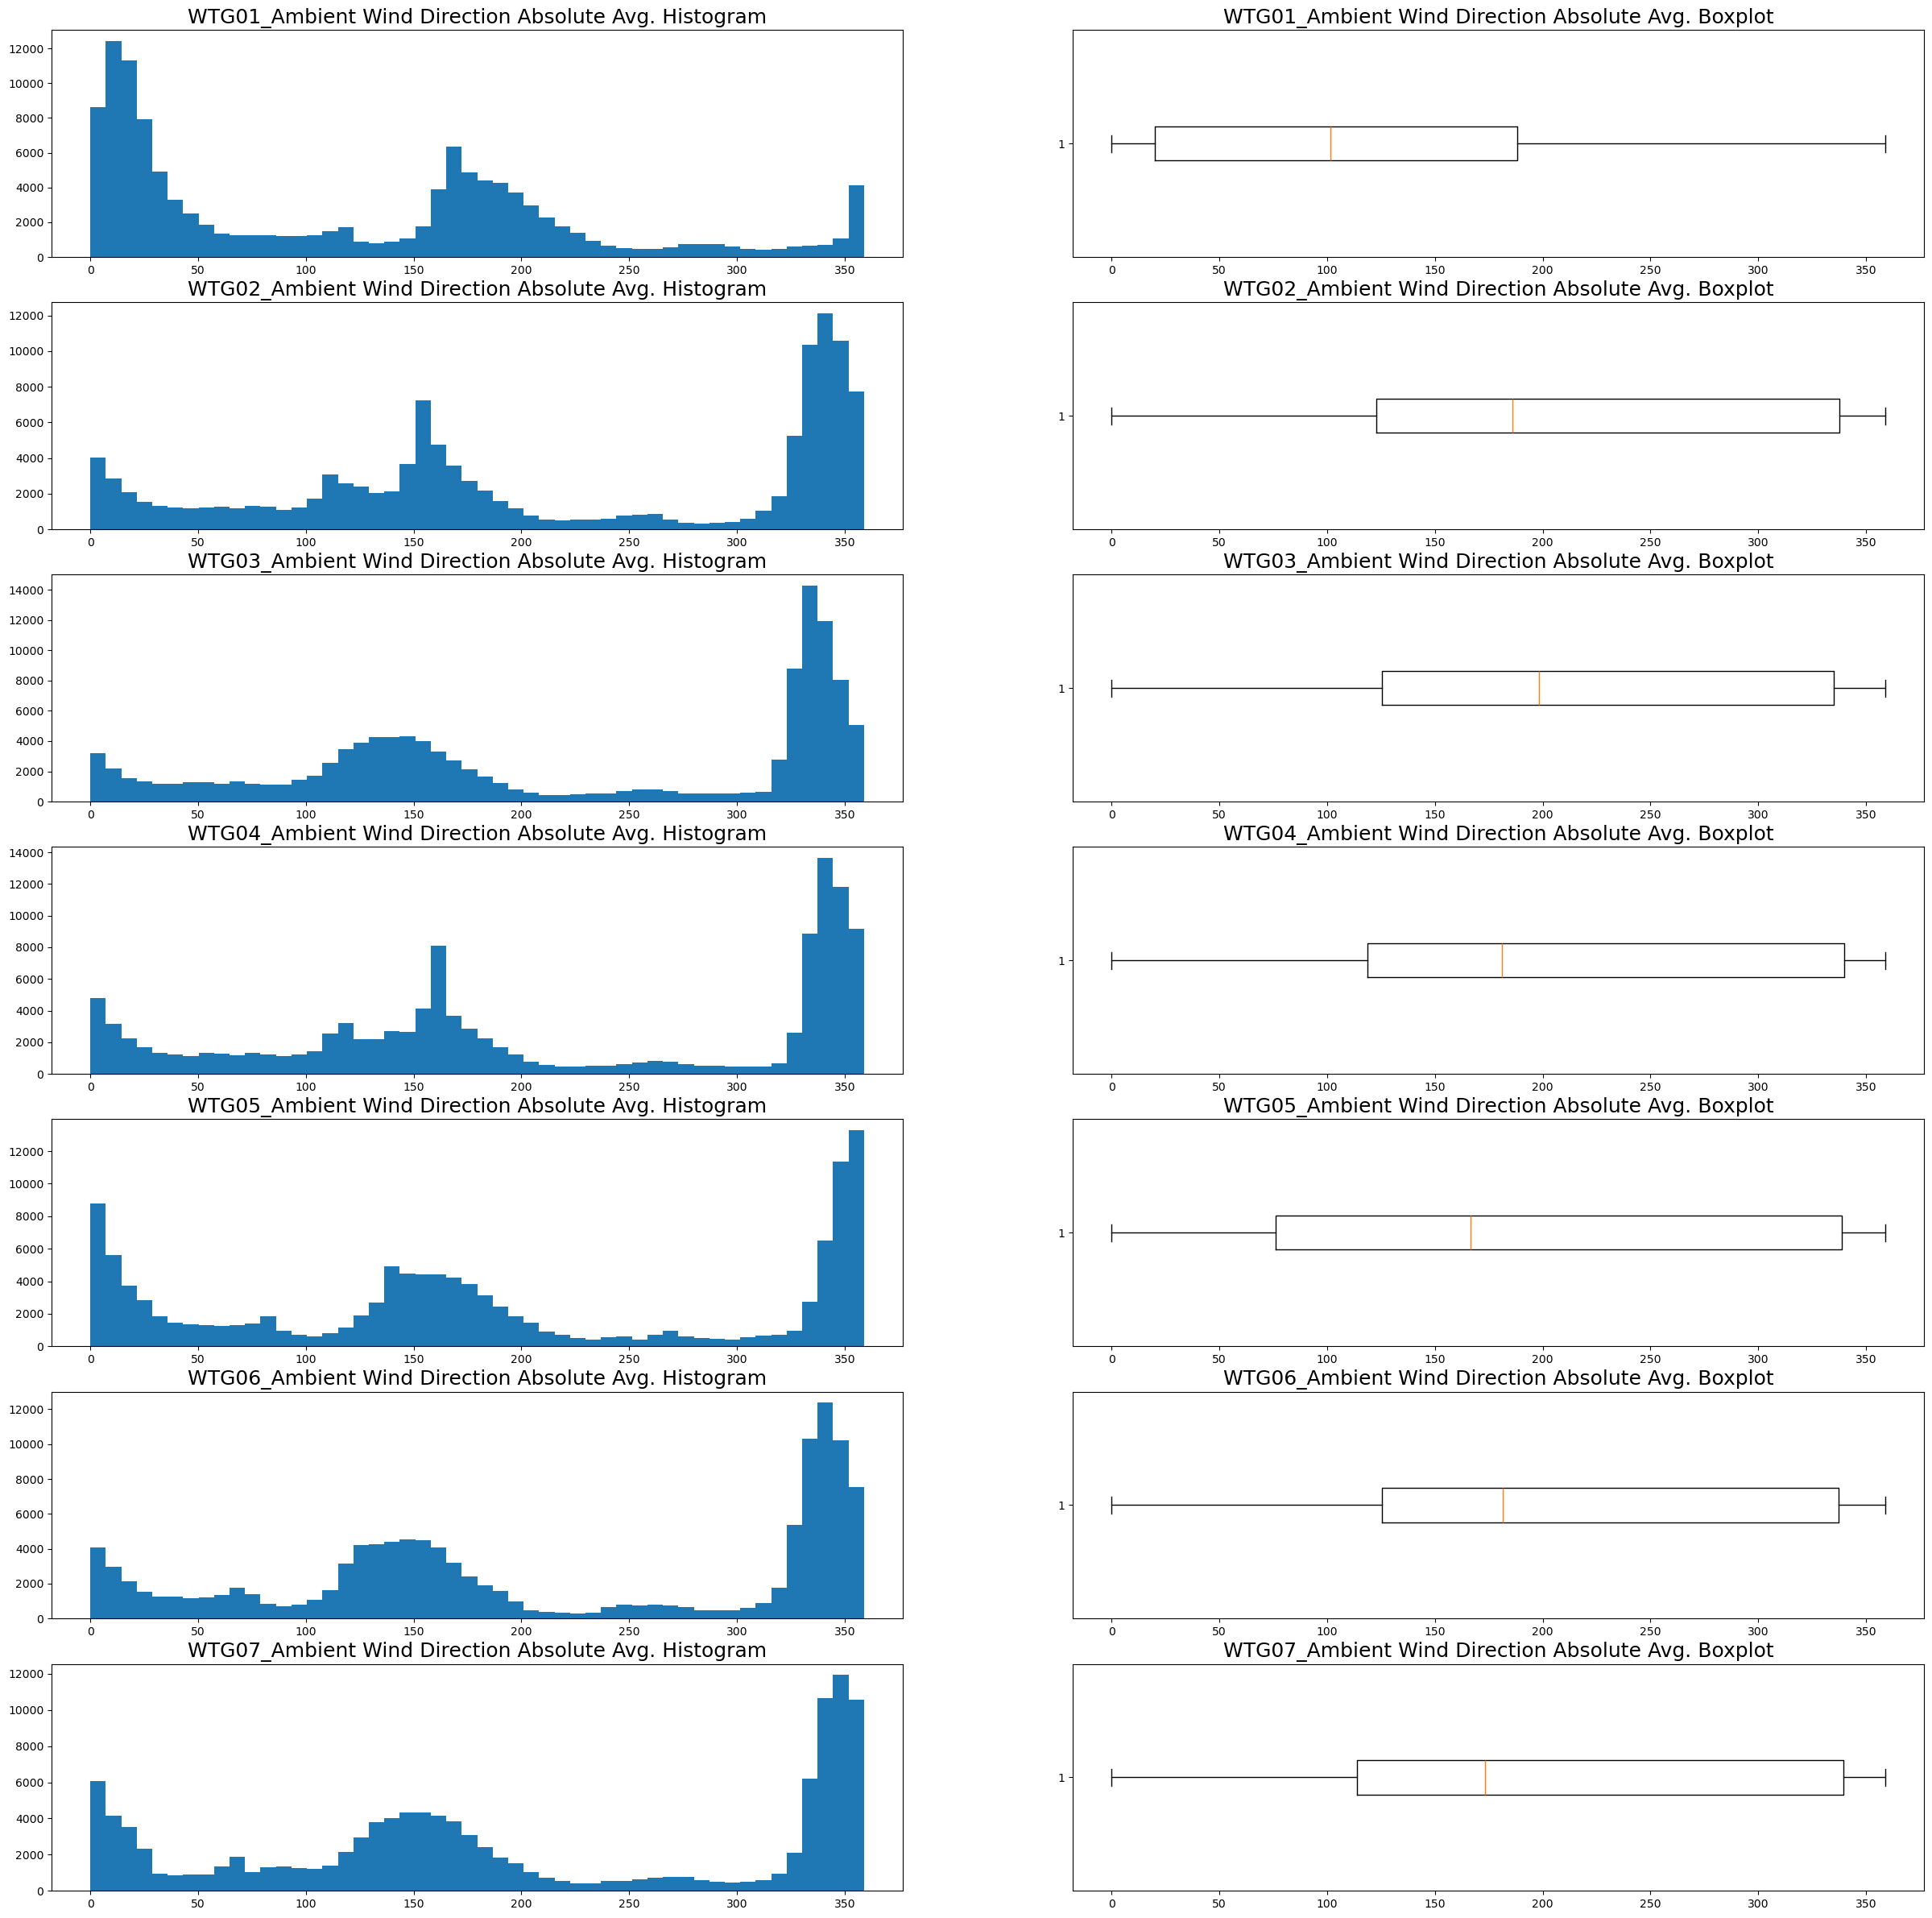

In [29]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(7,14): 
    ax[i-7,0].hist(dfs[f'WTG0{i-6}_Ambient WindDir Absolute Avg. ({i+1})'], bins=50)
    ax[i-7,0].set_title(f'WTG0{i-6}_Ambient Wind Direction Absolute Avg. Histogram', fontsize=18)
        
    ax[i-7,1].boxplot(dfs[f'WTG0{i-6}_Ambient WindDir Absolute Avg. ({i+1})'],vert=False)
    ax[i-7,1].set_title(f'WTG0{i-6}_Ambient Wind Direction Absolute Avg. Boxplot', fontsize=18)

plt.show()

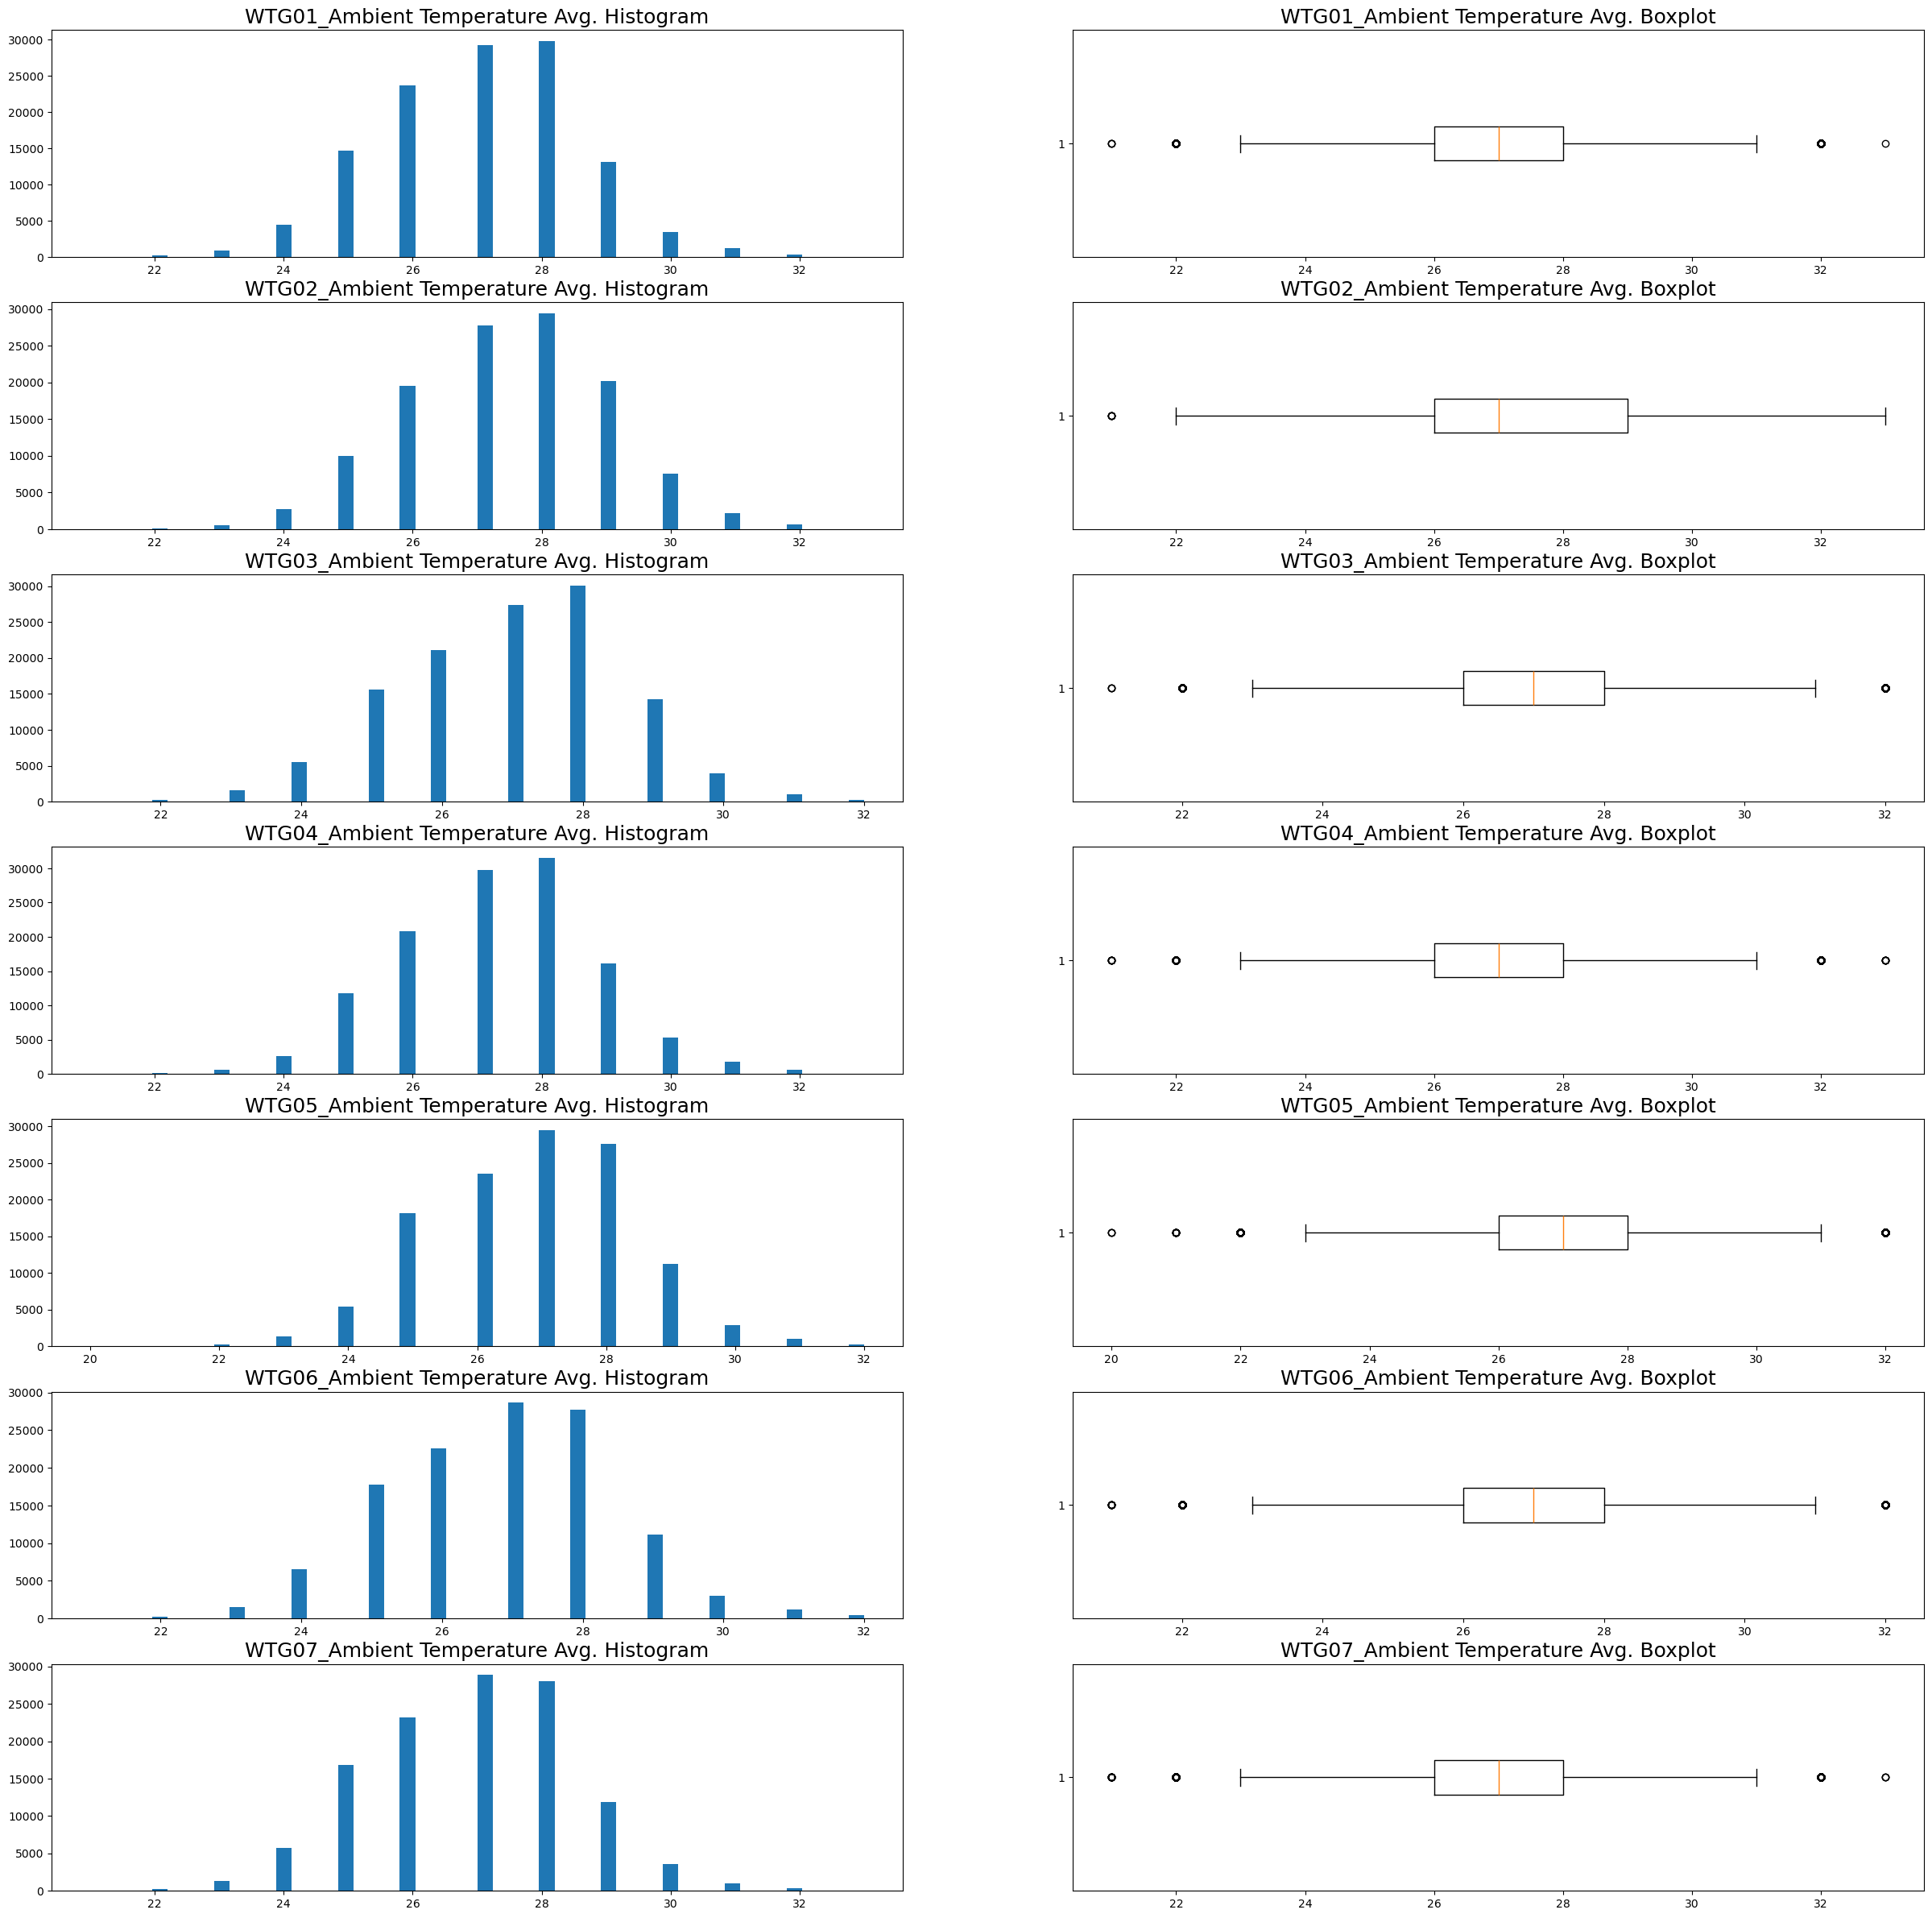

In [30]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(14, 21): 
    ax[i-14,0].hist(dfs[f'WTG0{i-13}_Ambient Temp. Avg. ({i+1})'], bins=50)
    ax[i-14,0].set_title(f'WTG0{i-13}_Ambient Temperature Avg. Histogram', fontsize=18)
        
    ax[i-14,1].boxplot(dfs[f'WTG0{i-13}_Ambient Temp. Avg. ({i+1})'],vert=False)
    ax[i-14,1].set_title(f'WTG0{i-13}_Ambient Temperature Avg. Boxplot', fontsize=18)

plt.show()

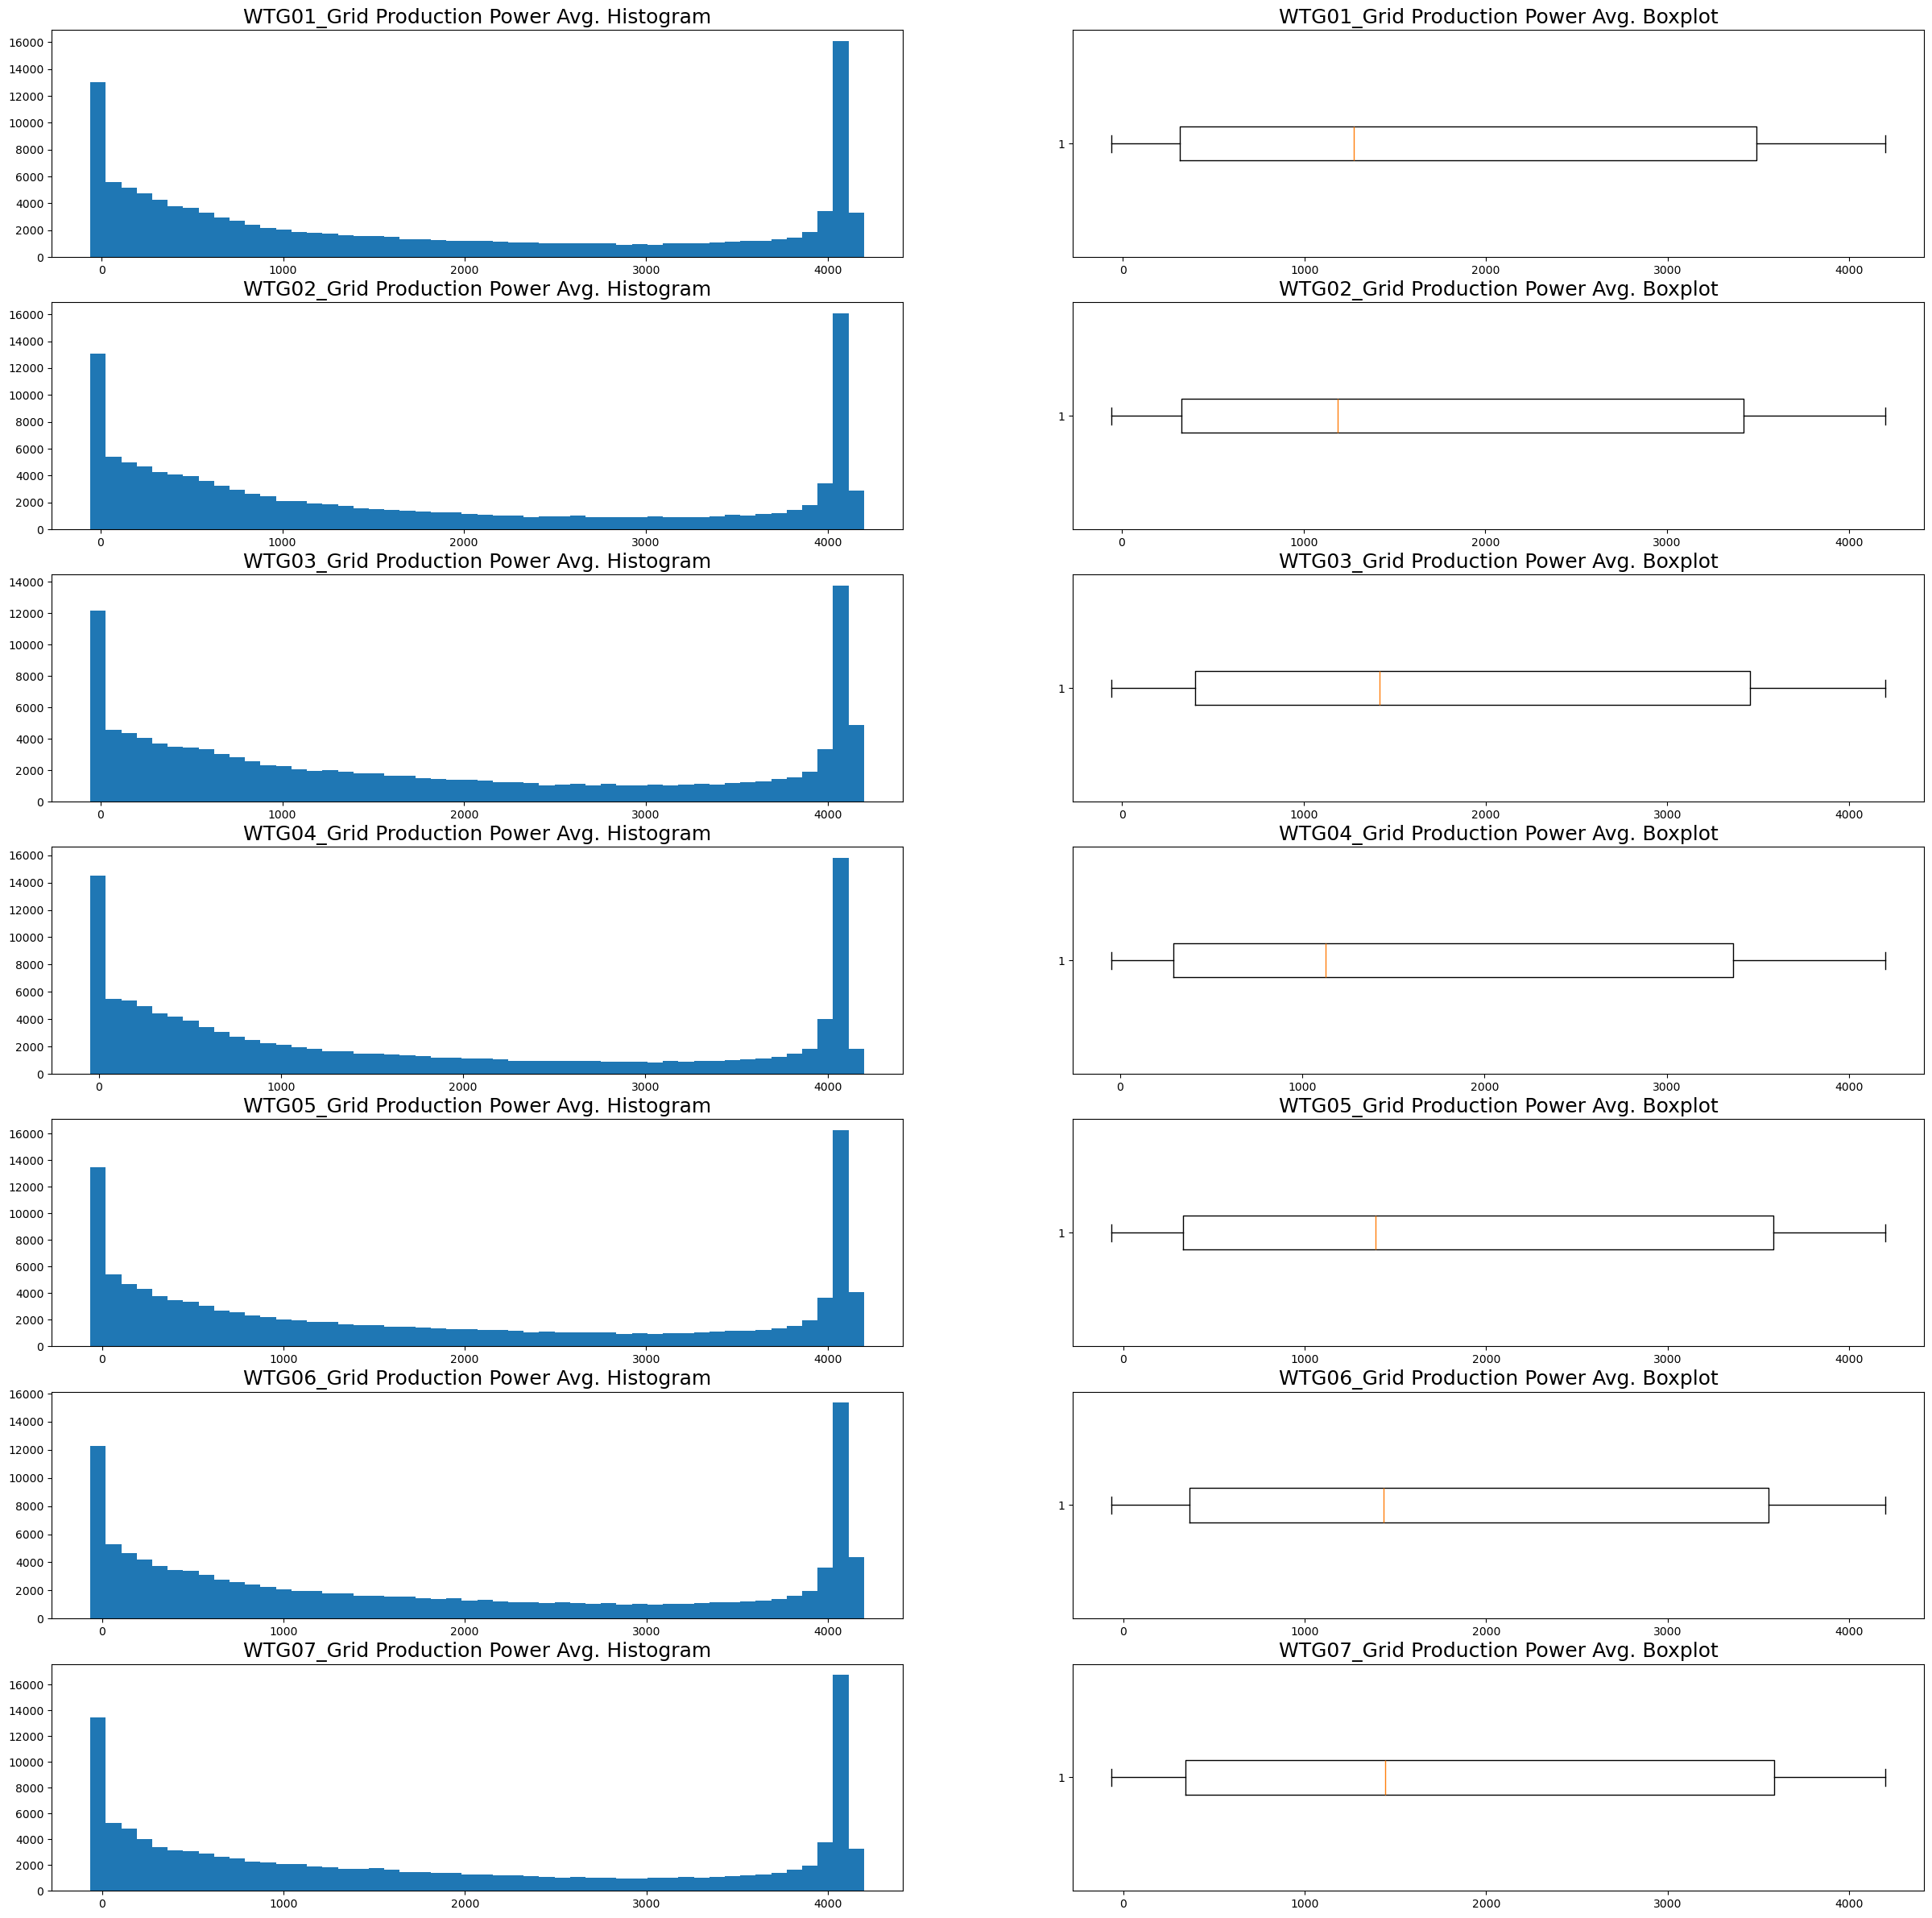

In [31]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(21, 28): 
    ax[i-21,0].hist(dfs[f'WTG0{i-20}_Grid Production Power Avg. ({i+1})'], bins=50)
    ax[i-21,0].set_title(f'WTG0{i-20}_Grid Production Power Avg. Histogram', fontsize=18)
        
    ax[i-21,1].boxplot(dfs[f'WTG0{i-20}_Grid Production Power Avg. ({i+1})'],vert=False)
    ax[i-21,1].set_title(f'WTG0{i-20}_Grid Production Power Avg. Boxplot', fontsize=18)

plt.show()

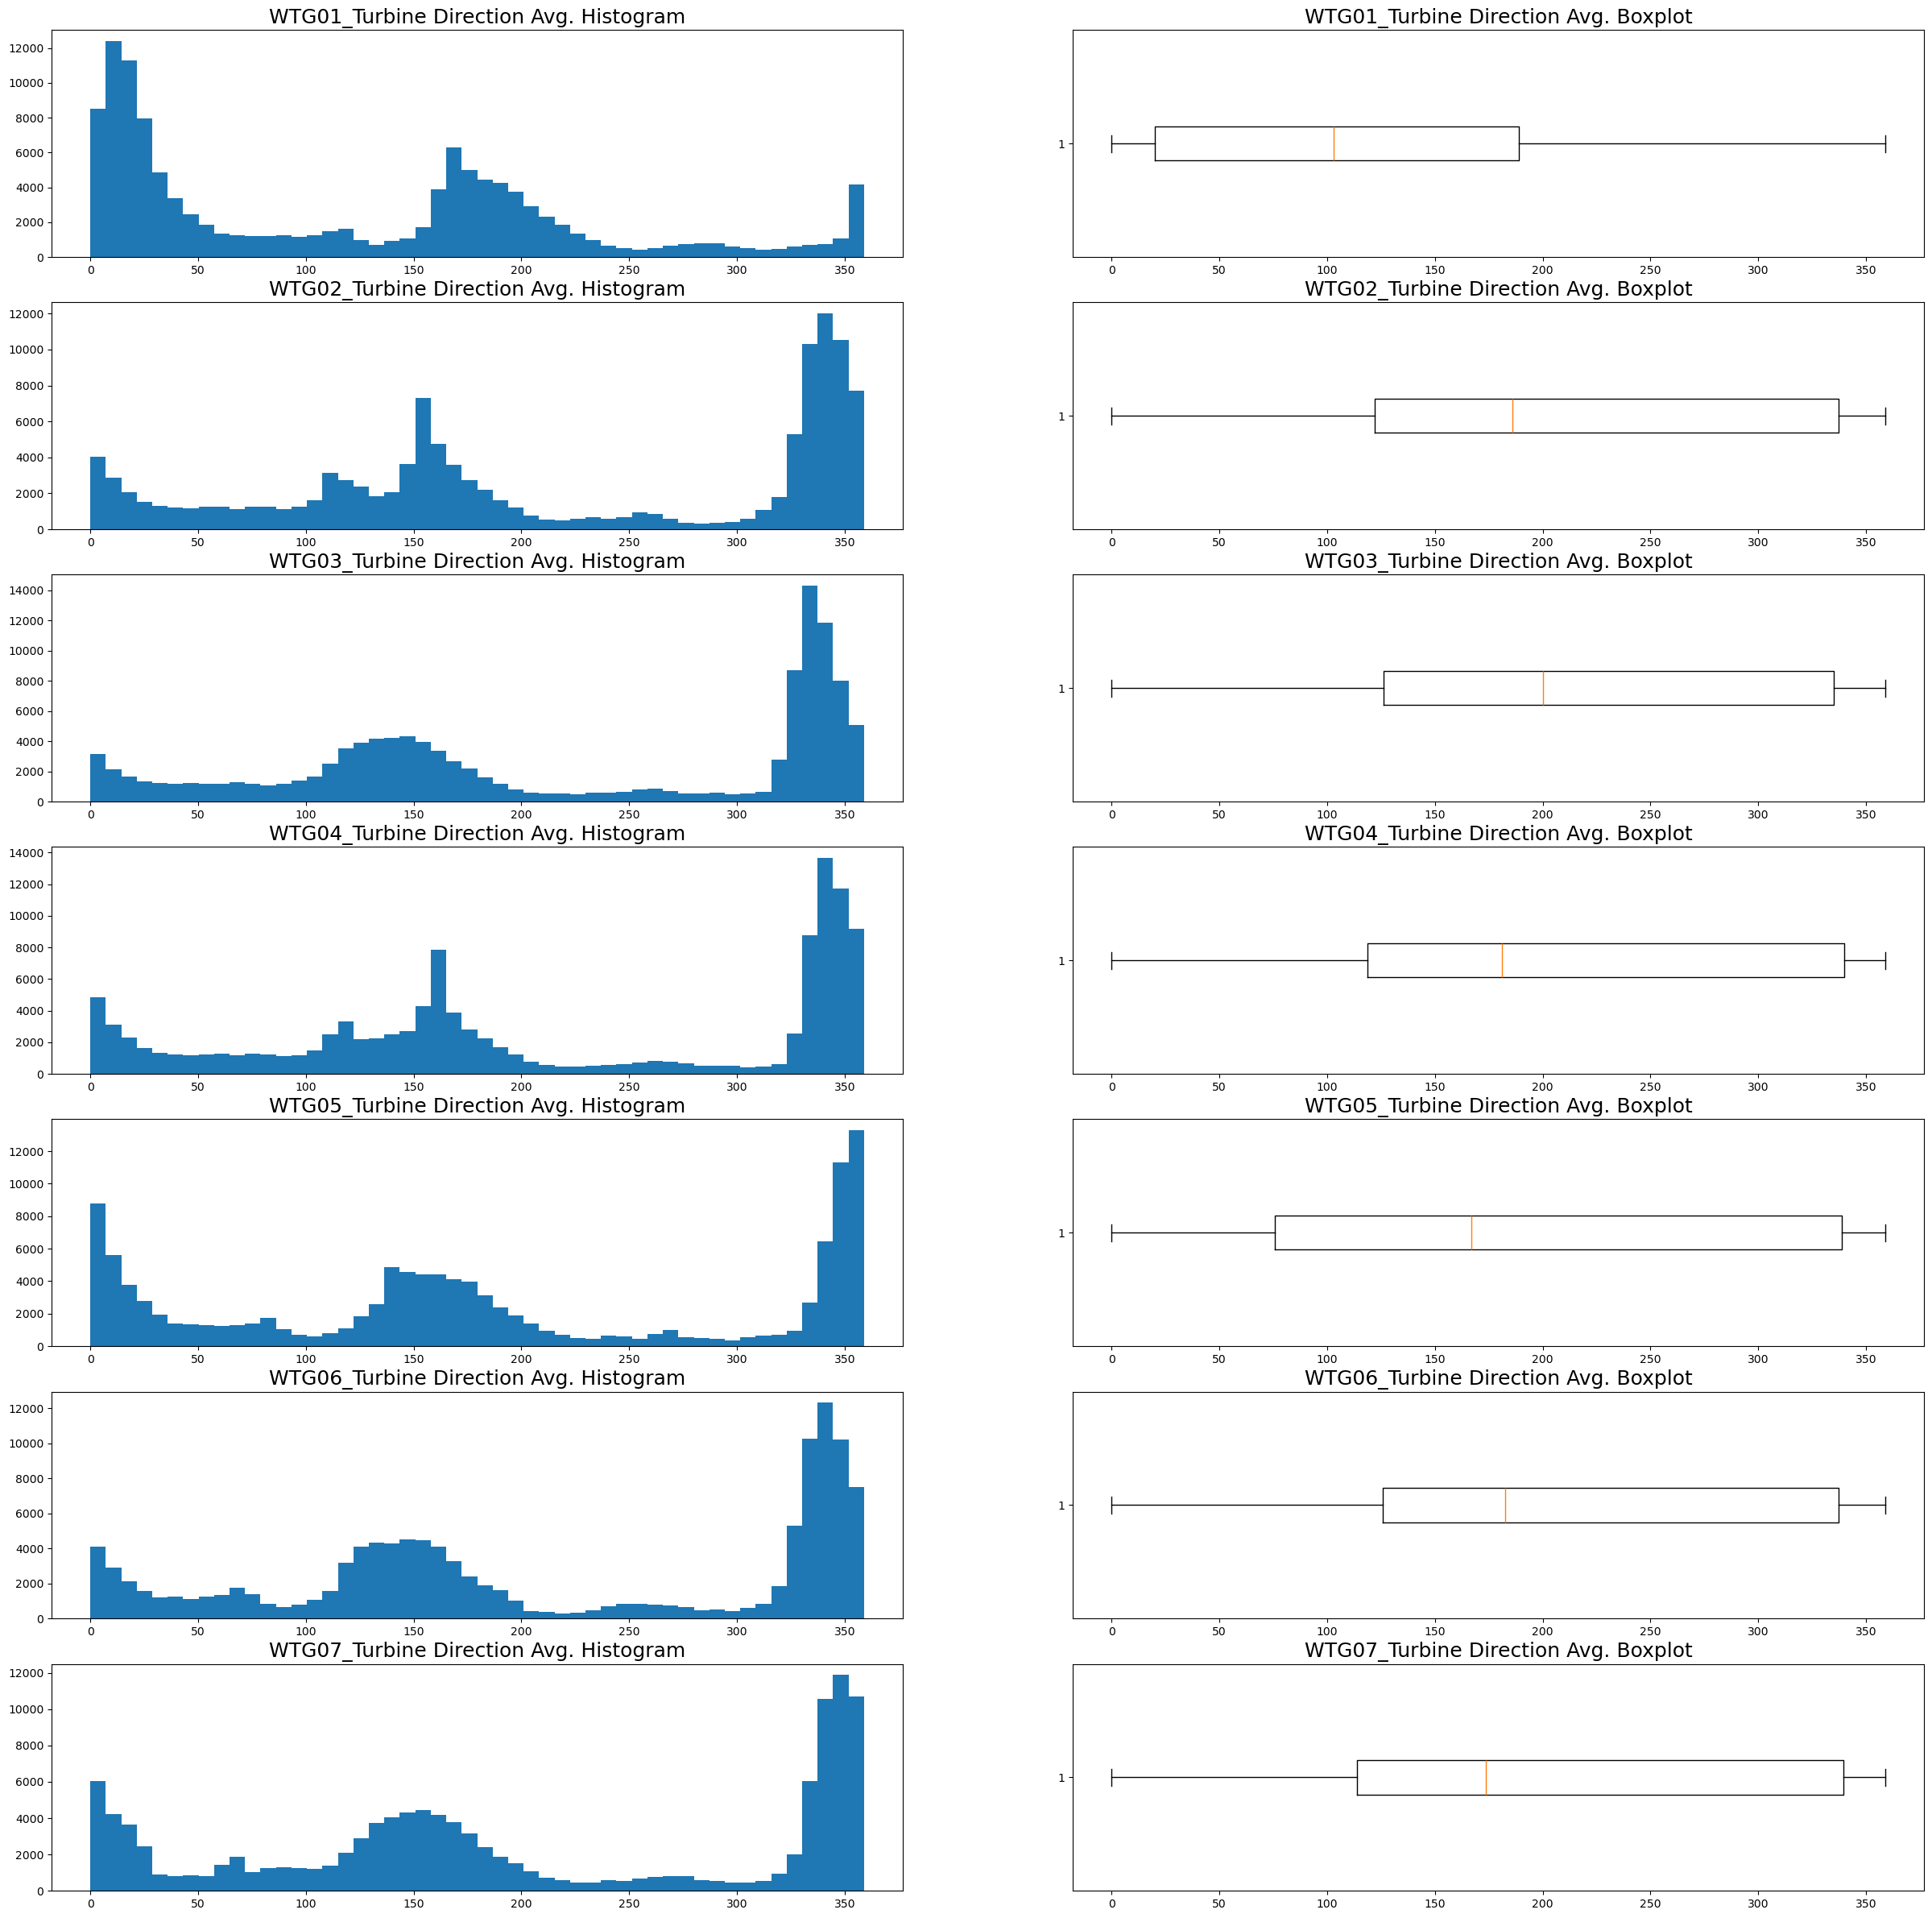

In [32]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(28, 35): 
    ax[i-28,0].hist(dfs[f'WTG0{i-27}_Avg. direction ({i+1})'], bins=50)
    ax[i-28,0].set_title(f'WTG0{i-27}_Turbine Direction Avg. Histogram', fontsize=18)
        
    ax[i-28,1].boxplot(dfs[f'WTG0{i-27}_Avg. direction ({i+1})'],vert=False)
    ax[i-28,1].set_title(f'WTG0{i-27}_Turbine Direction Avg. Boxplot', fontsize=18)

plt.show()